<a href="https://colab.research.google.com/github/Arijit1000/Mortality-Prediction/blob/main/Mortality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [7]:
from google.colab import files
uploaded=files.upload()

Saving hospital_data.csv to hospital_data.csv


In [9]:
df = pd.read_csv('hospital_data.csv')
df.head()

,Unnamed: 0,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,0,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,3/8/2013 20:38,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,6/8/2013 0:00,7/9/2013 0:00,NO,NaN,D
1,1,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,6/8/2013 7:26,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,8/8/2013 0:00,9/9/2013 0:00,NO,NaN,D
2,2,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,9/8/2013 18:30,12500,22/03/2017 20:25:18,11500,Hosp_48,G,Dist_12,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,3,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,Hosp_48,G,Dist_12,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,4,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Dist_12,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,Hosp_48,G,Dist_12,31/08/2013 00:00:00,2/10/2013 0:00,NO,NaN,D


In [10]:
df = df.drop('Unnamed: 0', axis=1)
df.shape

(479688, 20)

In [11]:
df.dtypes

AGE                  int64
SEX                 object
CASTE_NAME          object
CATEGORY_CODE       object
CATEGORY_NAME       object
SURGERY_CODE        object
SURGERY             object
DISTRICT_NAME       object
PREAUTH_DATE        object
PREAUTH_AMT          int64
CLAIM_DATE          object
CLAIM_AMOUNT         int64
HOSP_NAME           object
HOSP_TYPE           object
HOSP_DISTRICT       object
SURGERY_DATE        object
DISCHARGE_DATE      object
Mortality Y / N     object
MORTALITY_DATE      object
SRC_REGISTRATION    object
dtype: object

In [12]:
def missing_values(df):
    missing_val = df.isnull().sum()
    missing_val_percent = missing_val * 100 / len(df)
    missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)
    missing_val_table = missing_val_table.rename(columns={0 : 'Missing Values', 1 : '% of Total Values'})
    return missing_val_table

In [13]:
missing_vals = missing_values(df)
missing_vals.sort_values(by=['% of Total Values'], ascending=False).head()

,Missing Values,% of Total Values
MORTALITY_DATE,469566,97.889878
DISCHARGE_DATE,4560,0.950618
AGE,0,0.000000
SEX,0,0.000000
Mortality Y / N,0,0.000000


In [14]:
df = df.rename(columns={"Mortality Y / N": "Mortality"})

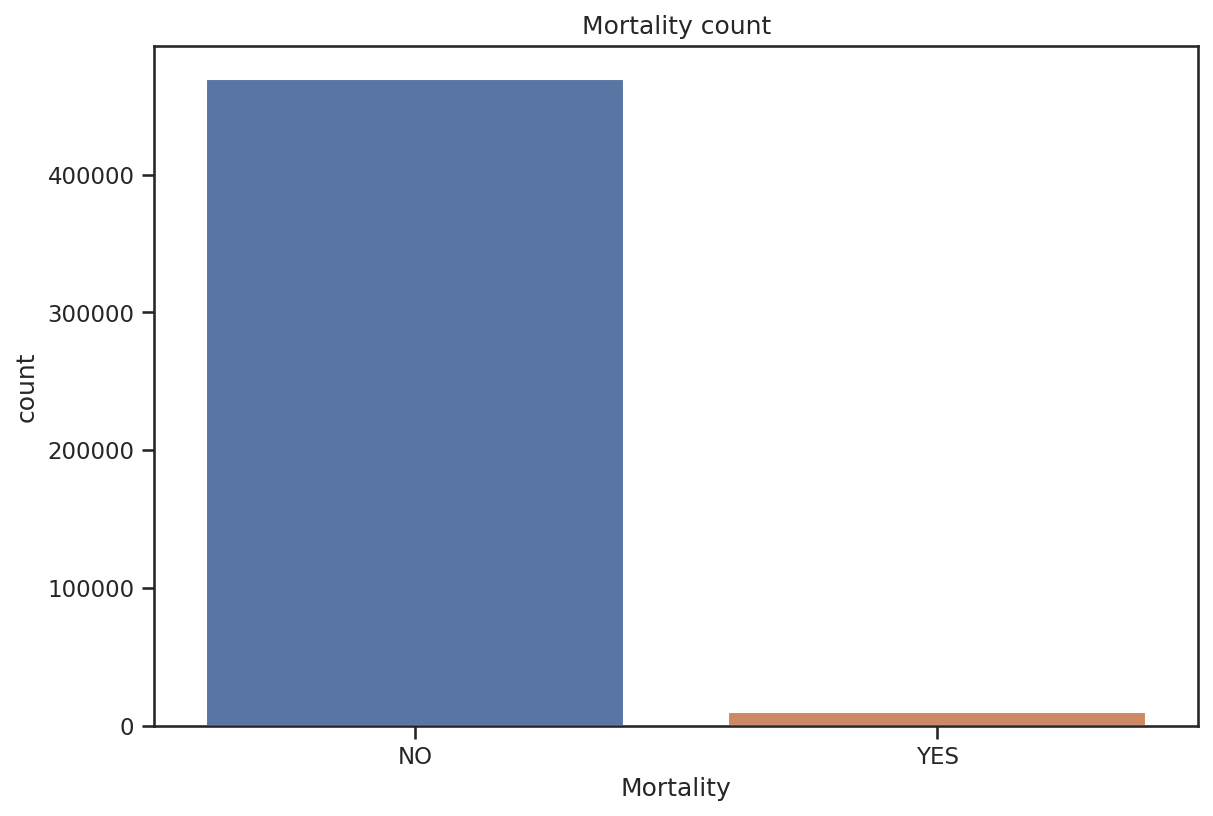

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='Mortality', data=df, order= df['Mortality'].value_counts().index)
plt.title('Mortality count')
plt.show()

In [16]:
df.loc[df['Mortality'] == 'NO', 'Mortality'] = 0
df.loc[df['Mortality'] == 'YES', 'Mortality'] = 1
df['Mortality'] = df['Mortality'].astype('int64')

In [17]:
# no. of unique vals in object type cols
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

SEX                      6
CASTE_NAME               6
CATEGORY_CODE           29
CATEGORY_NAME           29
SURGERY_CODE           925
SURGERY                923
DISTRICT_NAME           13
PREAUTH_DATE        372271
CLAIM_DATE           62773
HOSP_NAME              467
HOSP_TYPE                2
HOSP_DISTRICT           20
SURGERY_DATE           937
DISCHARGE_DATE         918
MORTALITY_DATE         740
SRC_REGISTRATION         4
dtype: int64

In [18]:
df.loc[(df['SEX'] == 'MALE') , 'SEX'] = 'Male'
df.loc[(df['SEX'] == 'FEMALE'), 'SEX'] = 'Female'
df.loc[(df['SEX'] == 'Male(Child)'), 'SEX'] = 'Boy'
df.loc[(df['SEX'] == 'Female(Child)'), 'SEX'] = 'Girl'

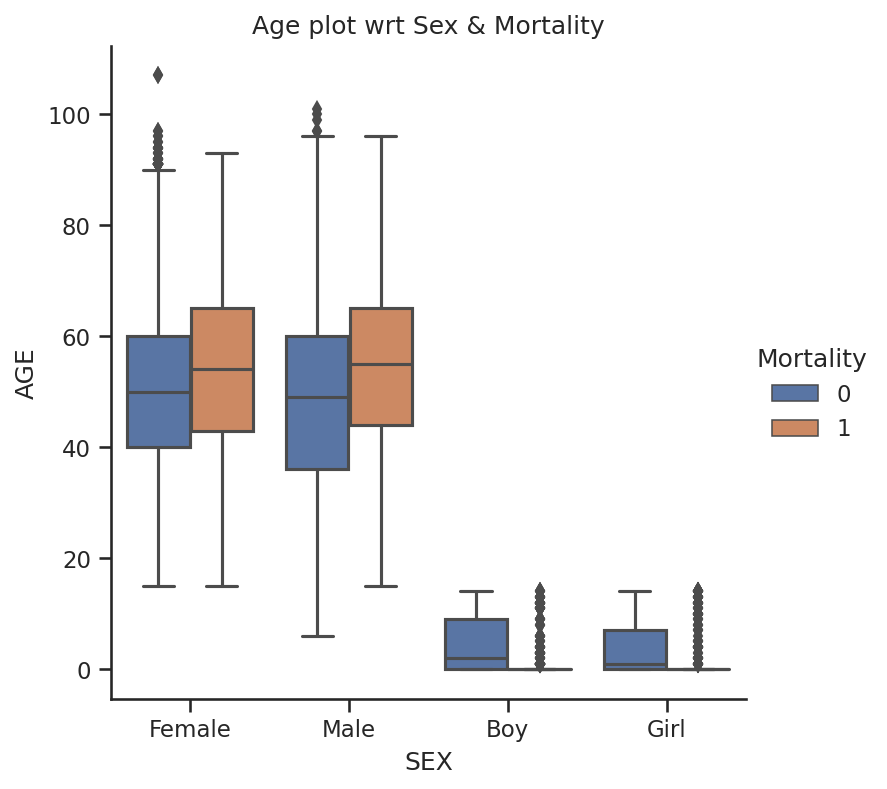

In [19]:
sns.catplot(x="SEX", y="AGE", hue="Mortality", kind="box", data=df)
plt.title('Age plot wrt Sex & Mortality')
plt.show()

In [20]:
# Using AGE col for plotting purpose since it will have the range of ages, the col will be dropped during training
df['Age'] = df['AGE']

df.loc[df['Age'] == 0, 'Age'] = 5
df.loc[(df['Age'] > 100), 'AGE'] = 100

In [21]:
df.loc[df['AGE'] <= 10, 'AGE'] = 10
df.loc[(df['AGE'] > 10) & (df['AGE'] <= 20), 'AGE'] = 20
df.loc[(df['AGE'] > 20) & (df['AGE'] <= 30), 'AGE'] = 30
df.loc[(df['AGE'] > 30) & (df['AGE'] <= 40), 'AGE'] = 40
df.loc[(df['AGE'] > 40) & (df['AGE'] <= 50), 'AGE'] = 50
df.loc[(df['AGE'] > 50) & (df['AGE'] <= 60), 'AGE'] = 60
df.loc[(df['AGE'] > 60) & (df['AGE'] <= 70), 'AGE'] = 70
df.loc[(df['AGE'] > 70) & (df['AGE'] <= 80), 'AGE'] = 80
df.loc[(df['AGE'] > 80) & (df['AGE'] <= 90), 'AGE'] = 90
df.loc[(df['AGE'] > 90), 'AGE'] = 100

Text(0.5, 1.0, 'AGE count')

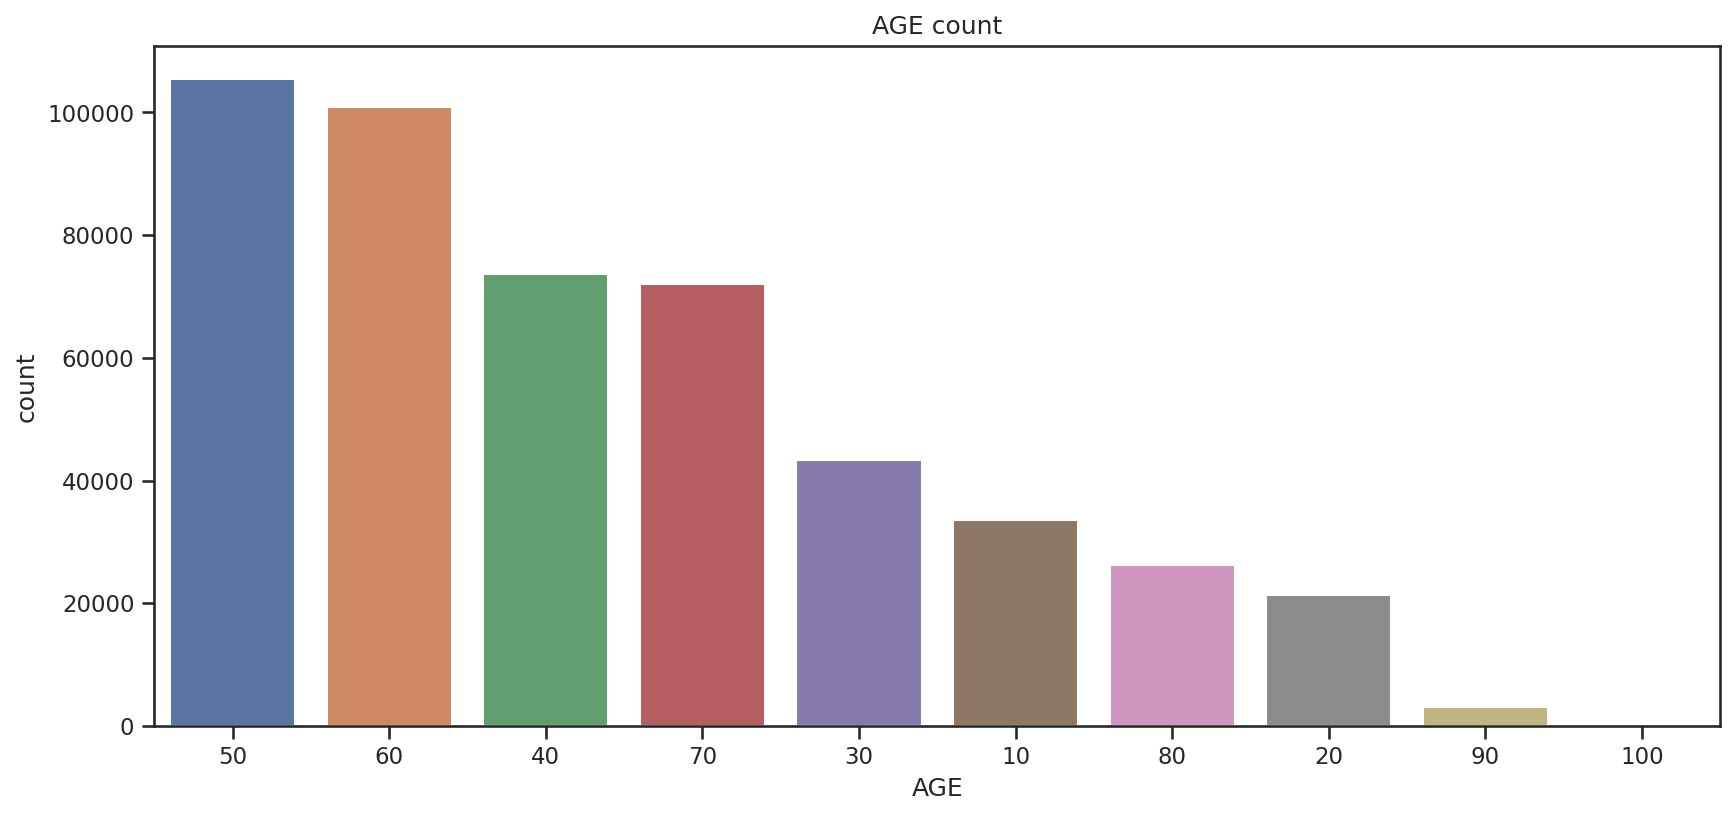

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x="AGE", data=df, order=df['AGE'].value_counts().index)
plt.title("AGE count")

In [23]:
temp_df = df.groupby(['Mortality', 'AGE'])['AGE'].count().unstack(['AGE'])
temp_df.head()

AGE,10,20,30,40,50,60,70,80,90,100
Mortality,,,,,,,,,,
0,32505,21118,42731,72628,103677,98499,70038,25360,2890,120
1,979,267,599,1061,1828,2366,2068,832,113,9


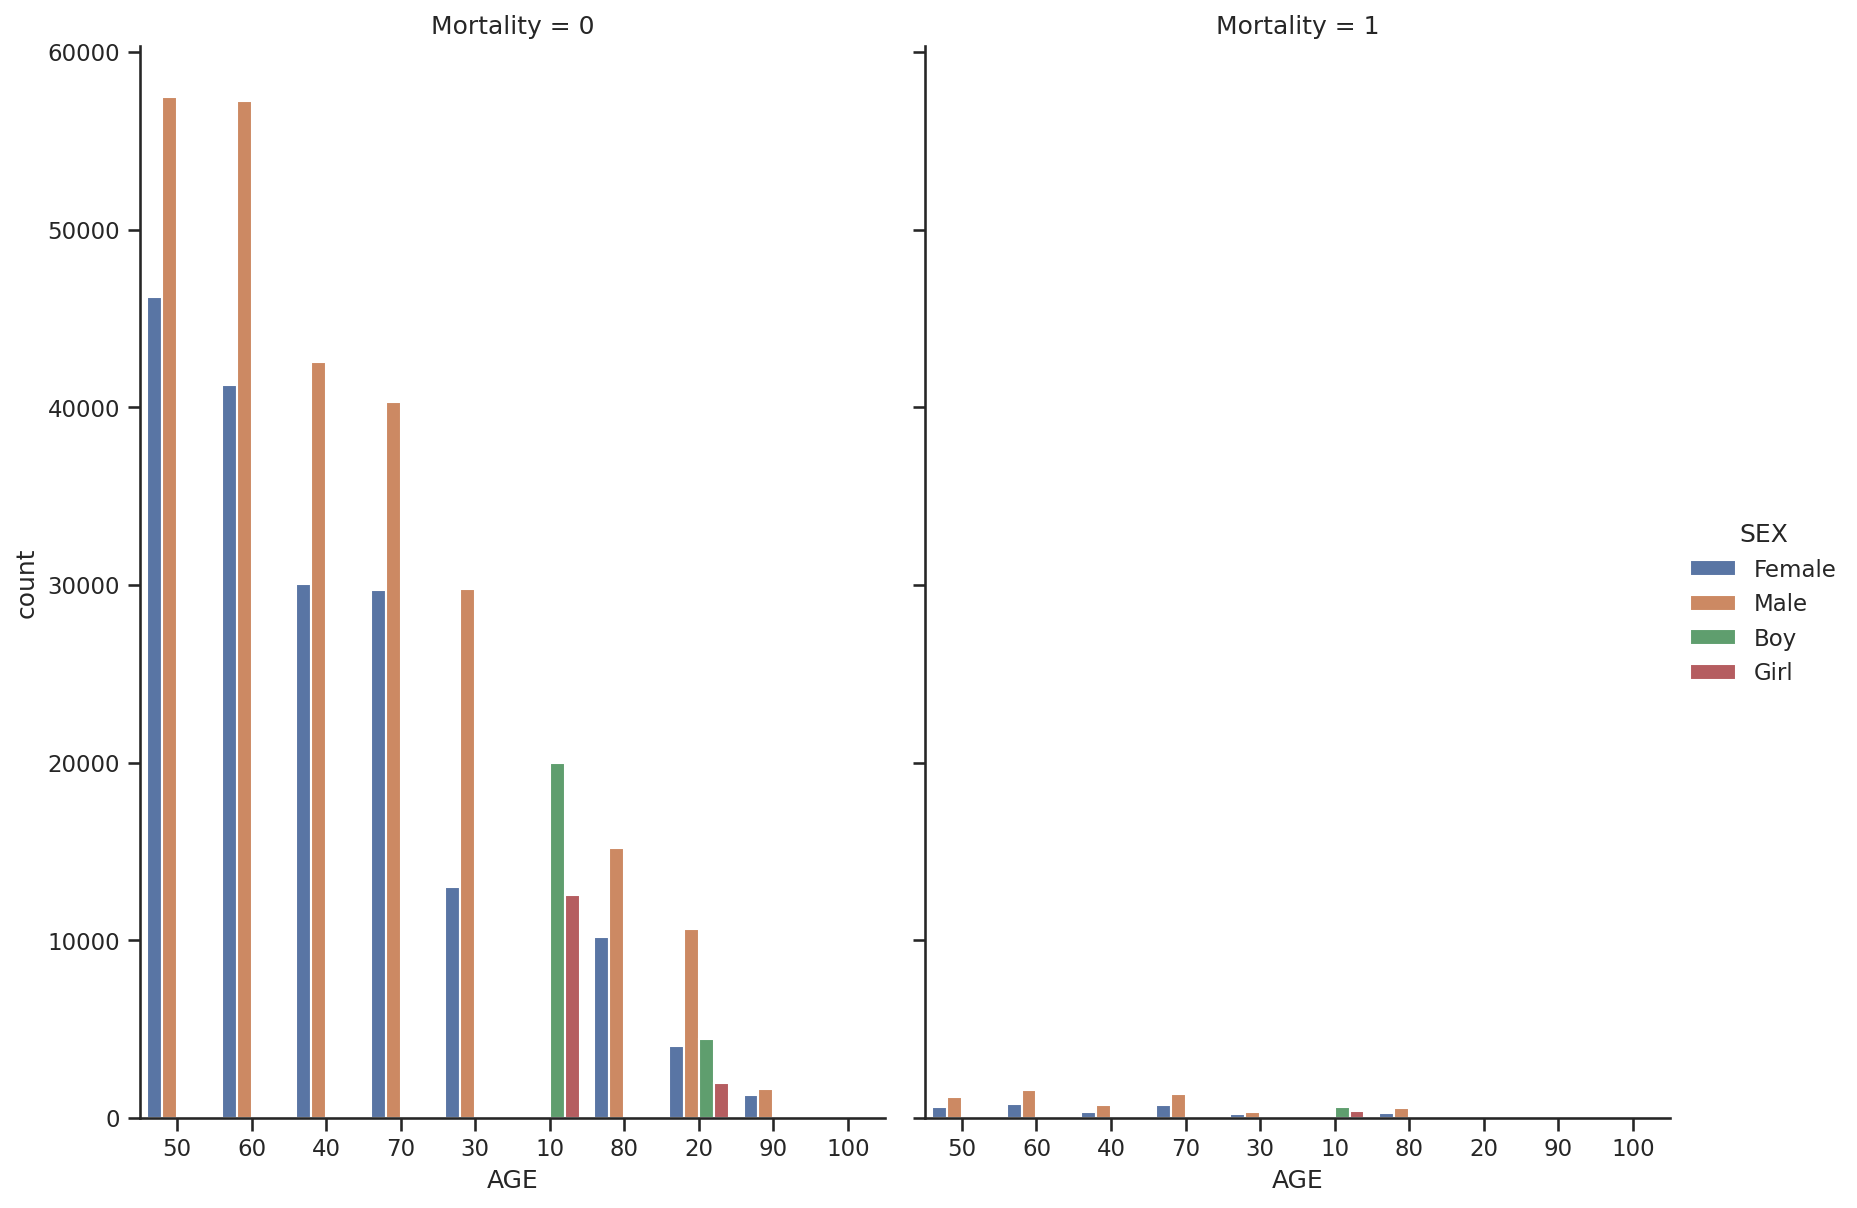

In [24]:
sns.catplot(x='AGE', col='Mortality', hue='SEX', data=df,order=df['AGE'].value_counts().index, kind='count', height=8, aspect=.7)

Text(0.5, 1.0, 'SEX count')

<Figure size 1800x900 with 0 Axes>

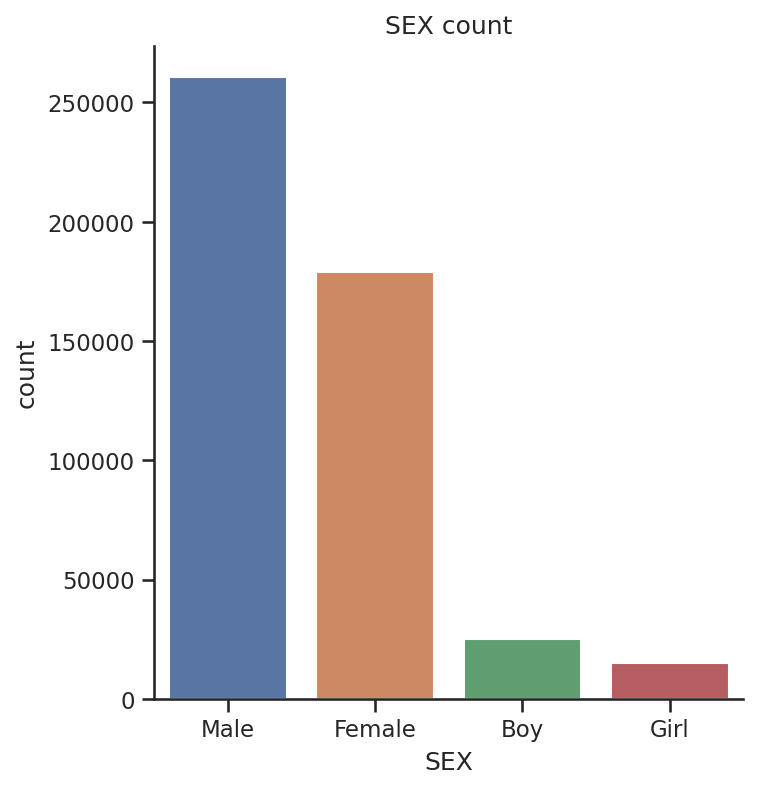

In [25]:
plt.figure(figsize=(12, 6))
sns.catplot(x="SEX", kind="count", data=df, order=df['SEX'].value_counts().index)
plt.title("SEX count")

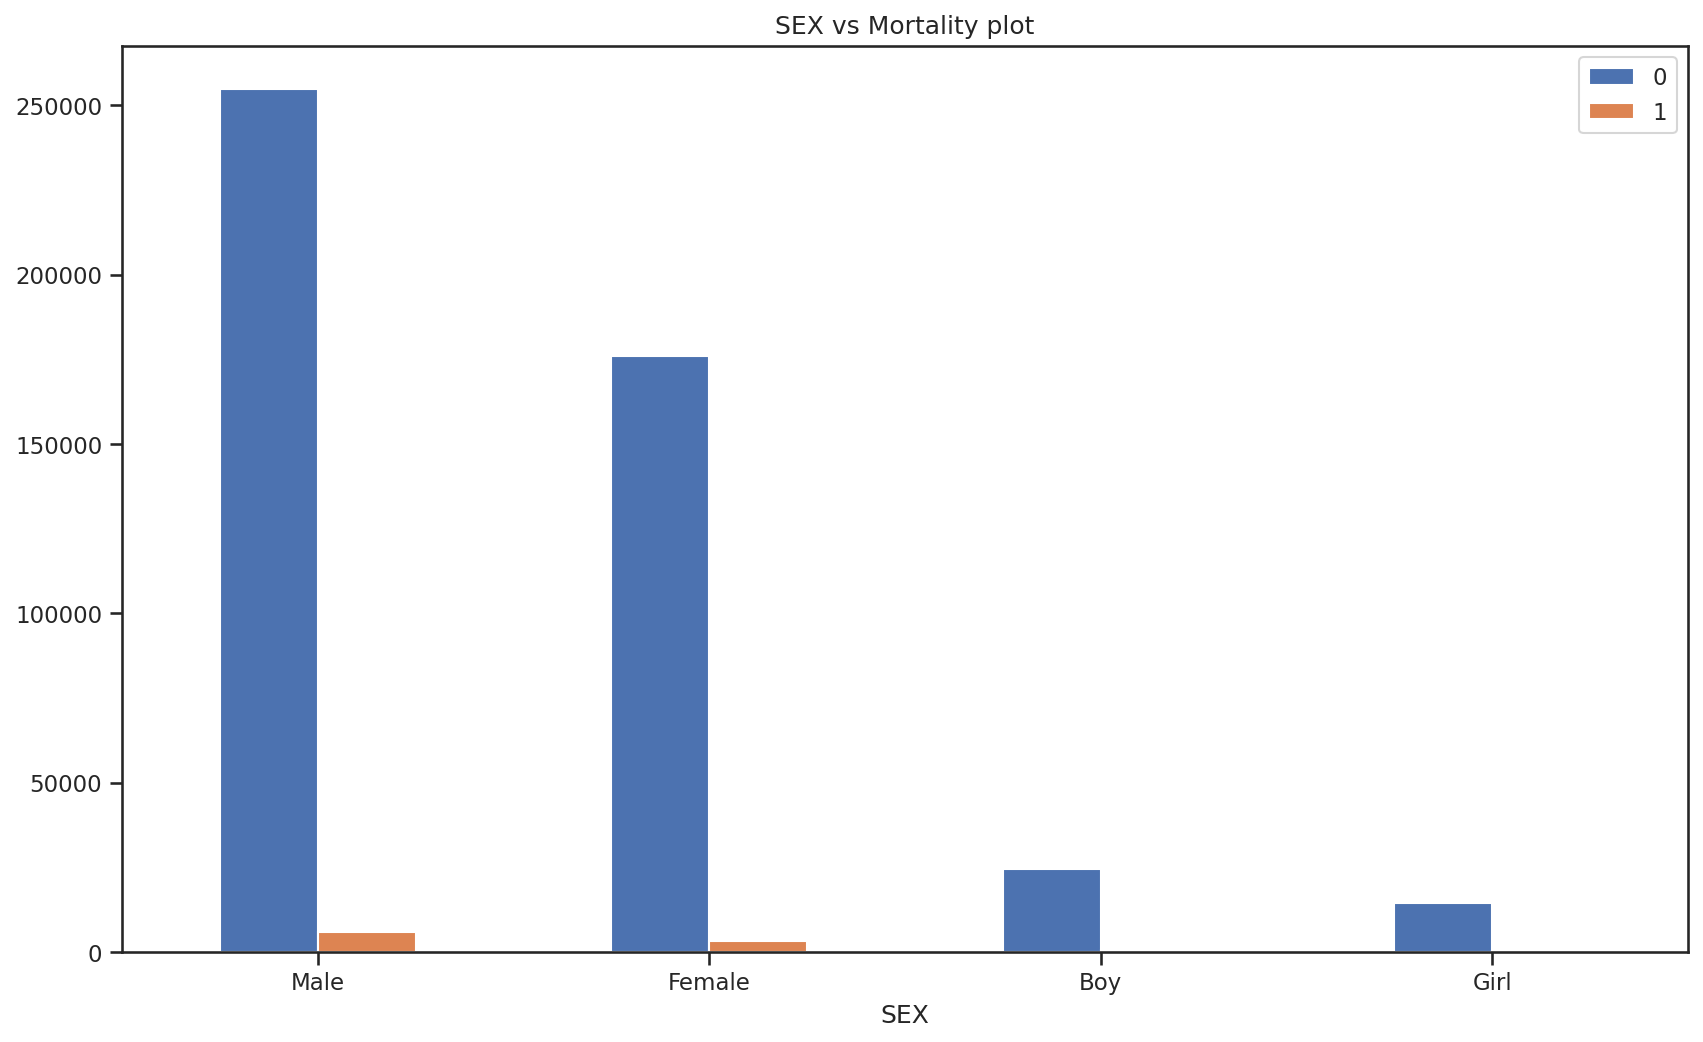

In [26]:
temp_df = df.groupby(['Mortality', 'SEX'])['SEX'].count().unstack('Mortality')
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(12,8))
plt.title('SEX vs Mortality plot')
plt.show()

In [27]:
temp_df = df.groupby(['Mortality', 'AGE', 'SEX'])['SEX'].count().unstack(['Mortality']).reset_index()
temp_df.columns = ['AGE', 'SEX', '0', '1']
temp_df.sort_values(by='0', ascending=False).head()

,AGE,SEX,0,1
12,50,Male,57451.0,1196.0
14,60,Male,57221.0,1584.0
11,50,Female,46226.0,632.0
10,40,Male,42556.0,720.0
13,60,Female,41278.0,782.0


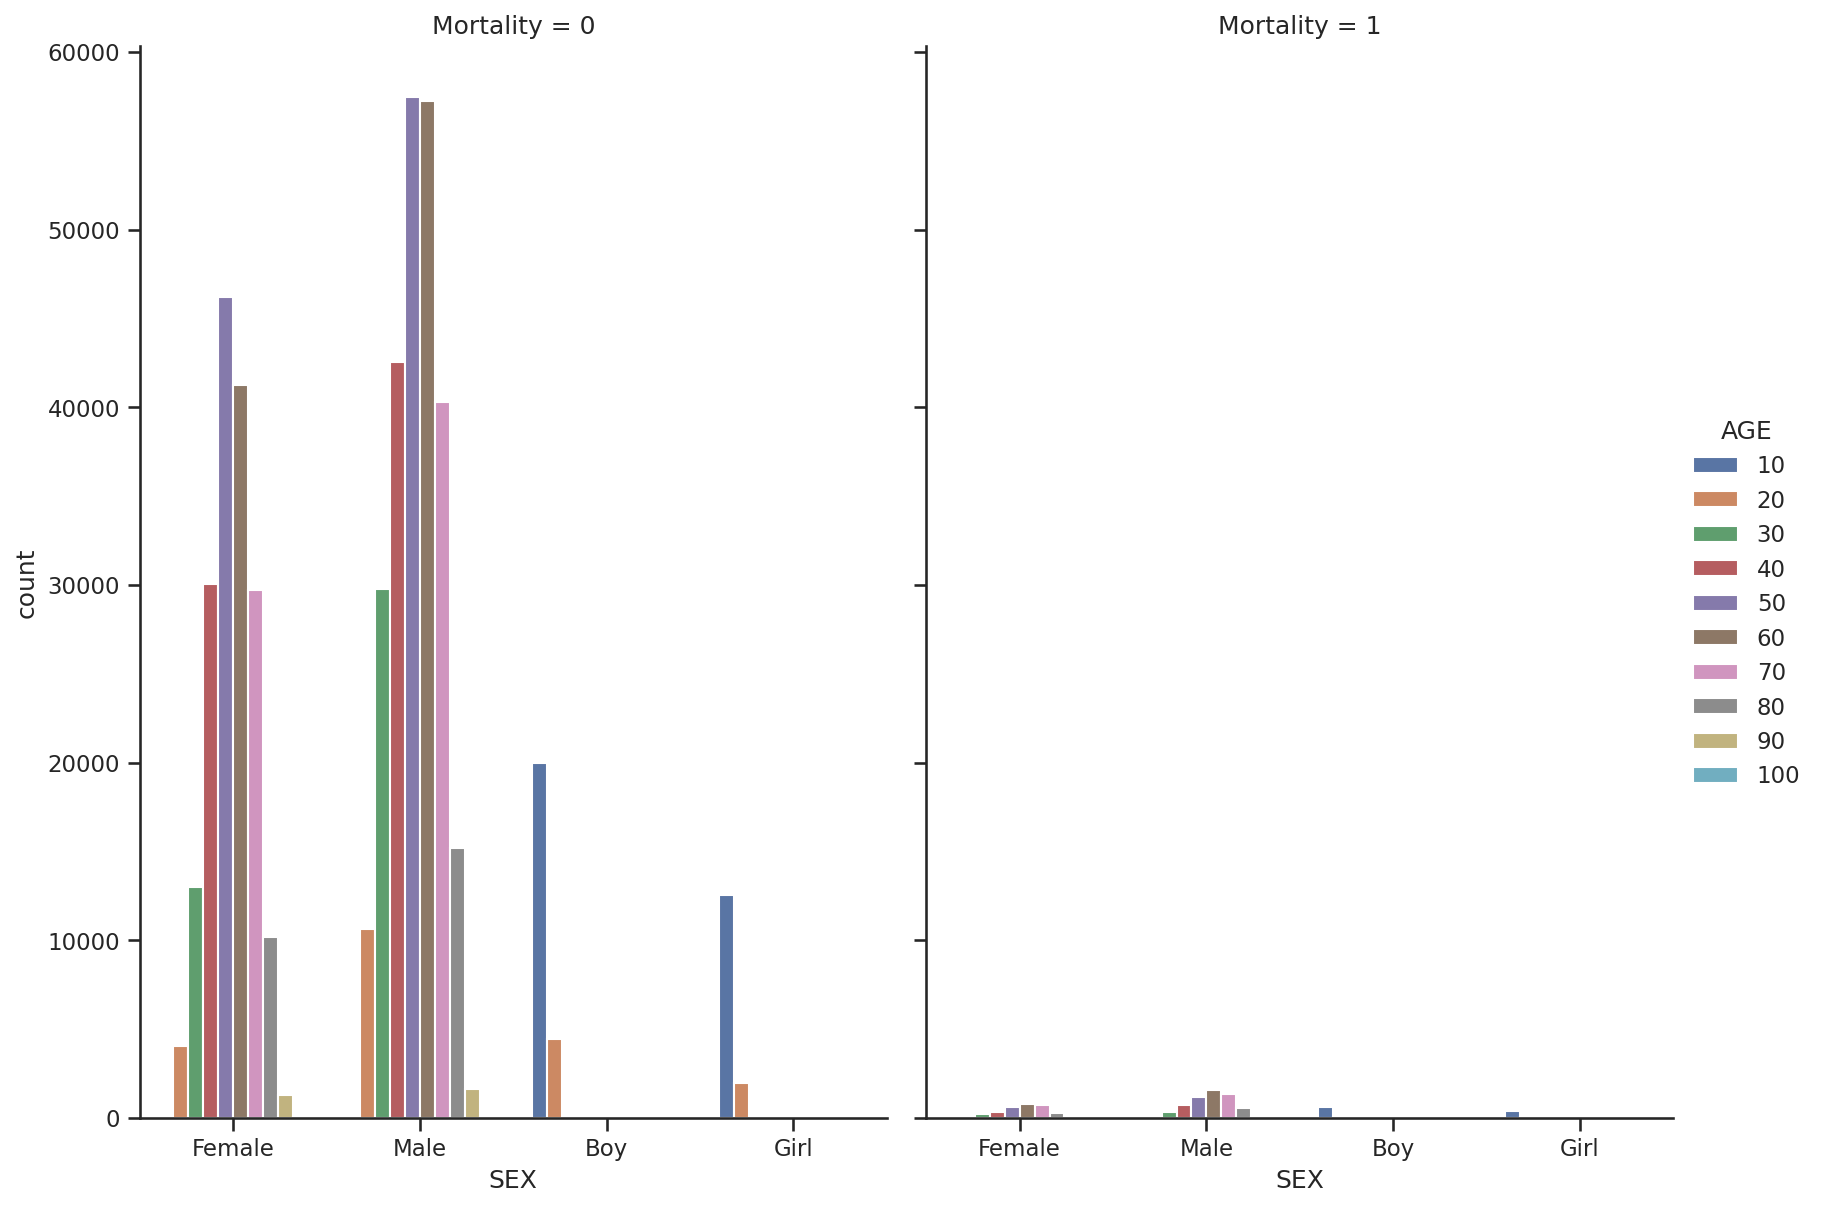

In [28]:
sns.catplot(x='SEX', col='Mortality', hue='AGE', data=df, kind='count', height=8, aspect=.7)

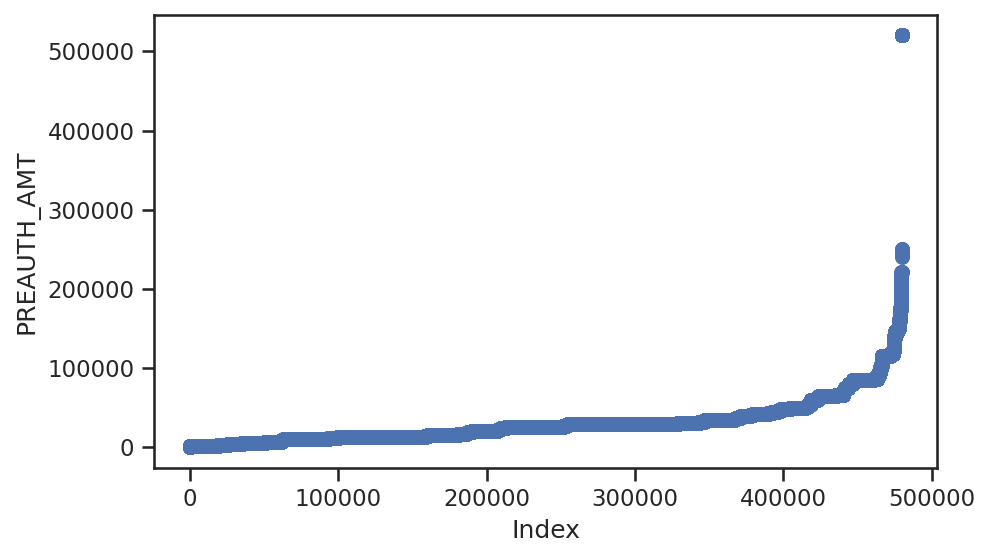

In [29]:
plt.figure(figsize=(6,4))
plt.scatter(range(df.shape[0]), np.sort(df['PREAUTH_AMT']))
plt.xlabel('Index')
plt.ylabel('PREAUTH_AMT')
plt.show()

In [30]:
upper_limit = np.percentile(df['PREAUTH_AMT'], 99)
df.loc[(df['PREAUTH_AMT'] > upper_limit), 'PREAUTH_AMT'] = upper_limit

<Figure size 1800x1200 with 0 Axes>

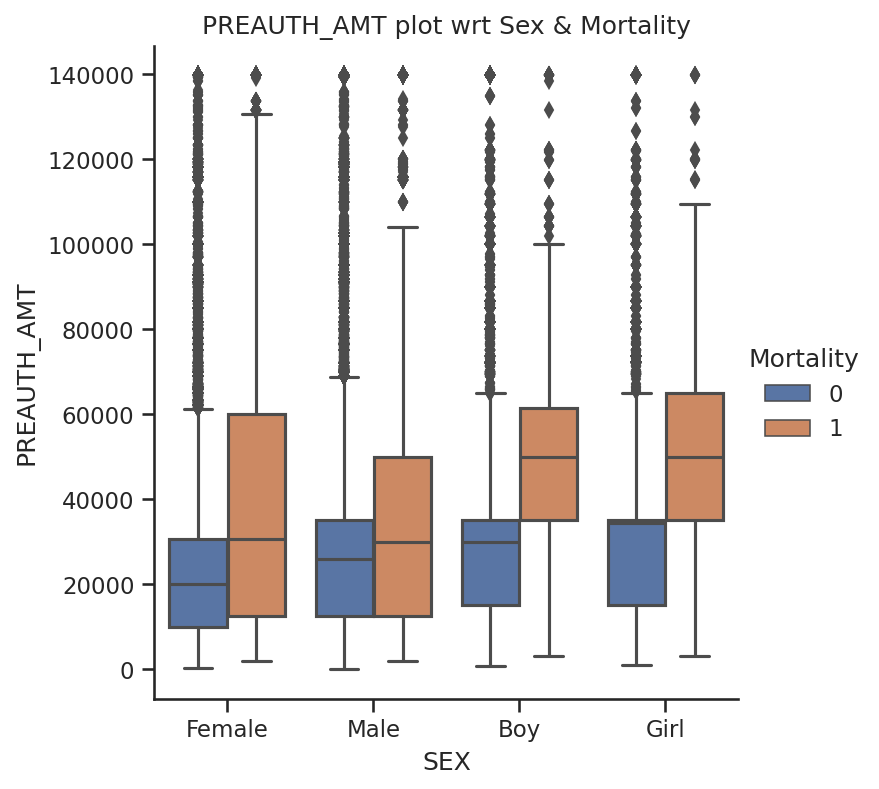

In [31]:
plt.figure(figsize=(12, 8))
sns.catplot(x="SEX", y="PREAUTH_AMT", hue="Mortality", kind="box", data=df)
plt.title('PREAUTH_AMT plot wrt Sex & Mortality')
plt.show()

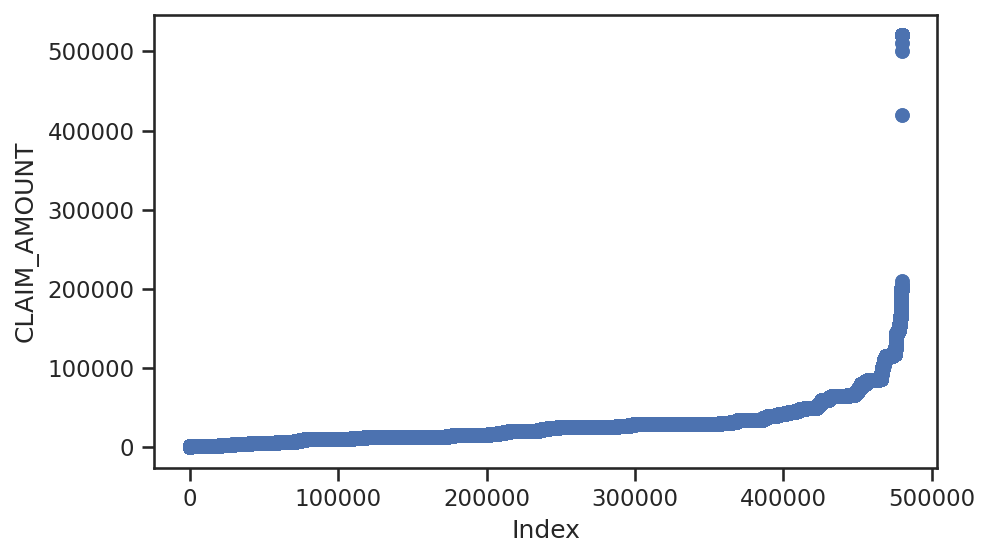

In [32]:
plt.figure(figsize=(6,4))
plt.scatter(range(df.shape[0]), np.sort(df['CLAIM_AMOUNT']))
plt.xlabel('Index')
plt.ylabel('CLAIM_AMOUNT')
plt.show()

In [33]:
upper_limit = np.percentile(df['CLAIM_AMOUNT'], 99)
df.loc[(df['CLAIM_AMOUNT'] > upper_limit), 'CLAIM_AMOUNT'] = upper_limit

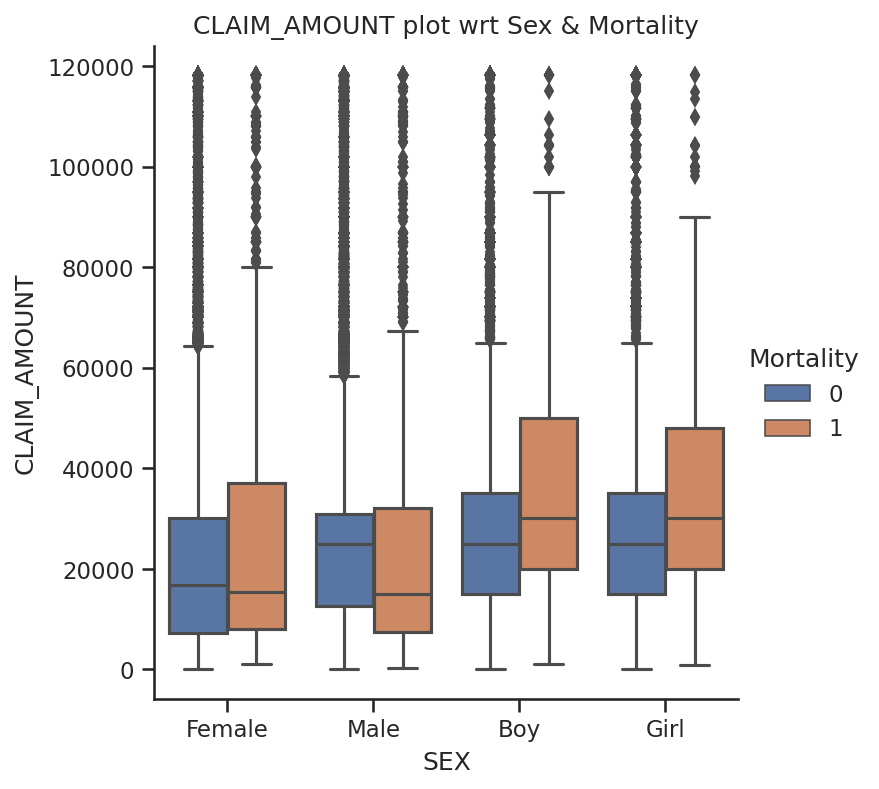

In [34]:
sns.catplot(x="SEX", y="CLAIM_AMOUNT", hue="Mortality", kind="box", data=df)
plt.title('CLAIM_AMOUNT plot wrt Sex & Mortality')
plt.show()

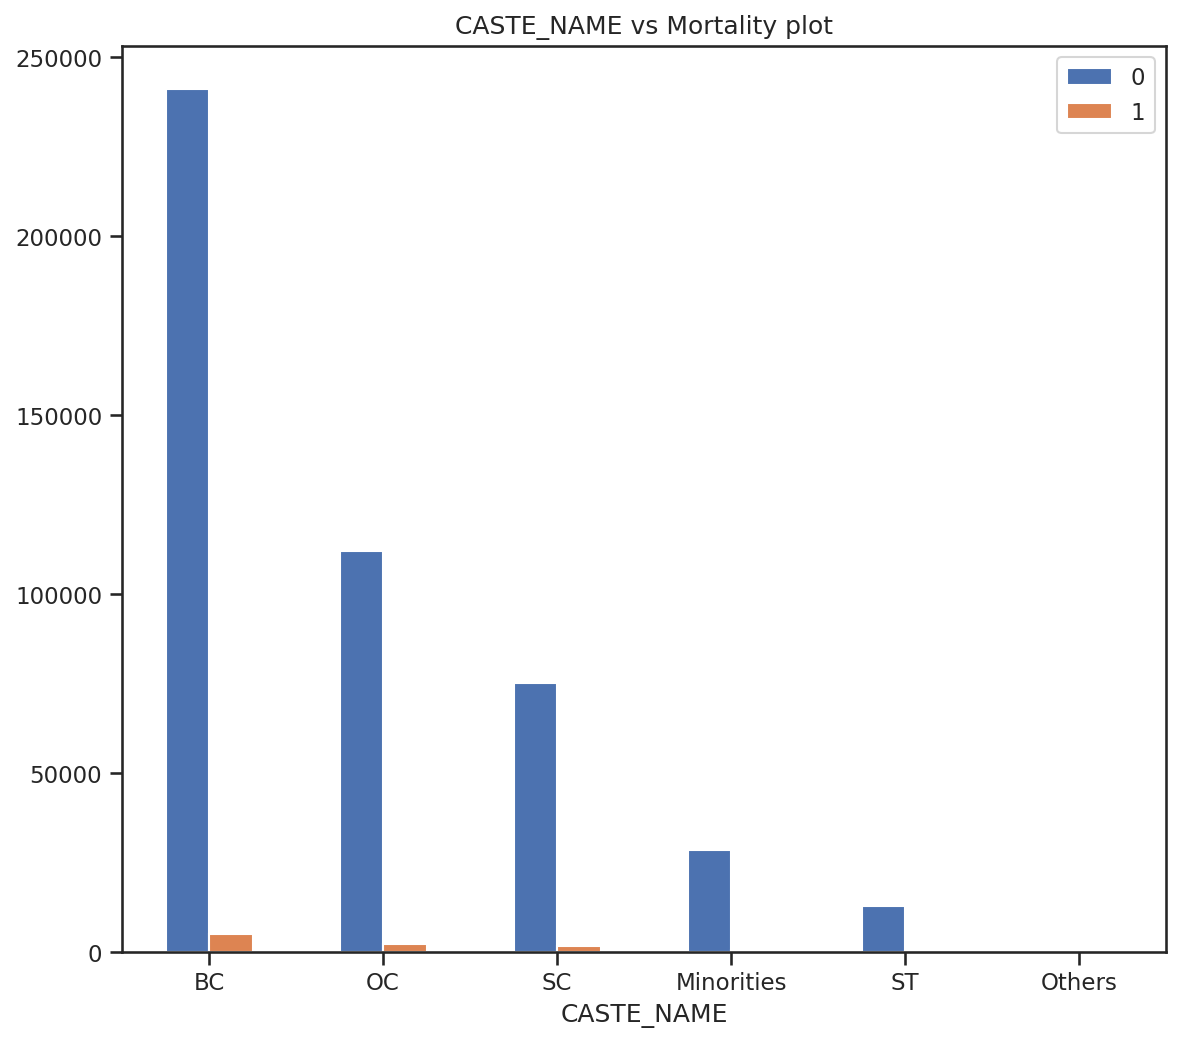

In [35]:
temp_df = df.groupby(['Mortality', 'CASTE_NAME'])['CASTE_NAME'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(8, 8))
plt.title('CASTE_NAME vs Mortality plot')
plt.show()

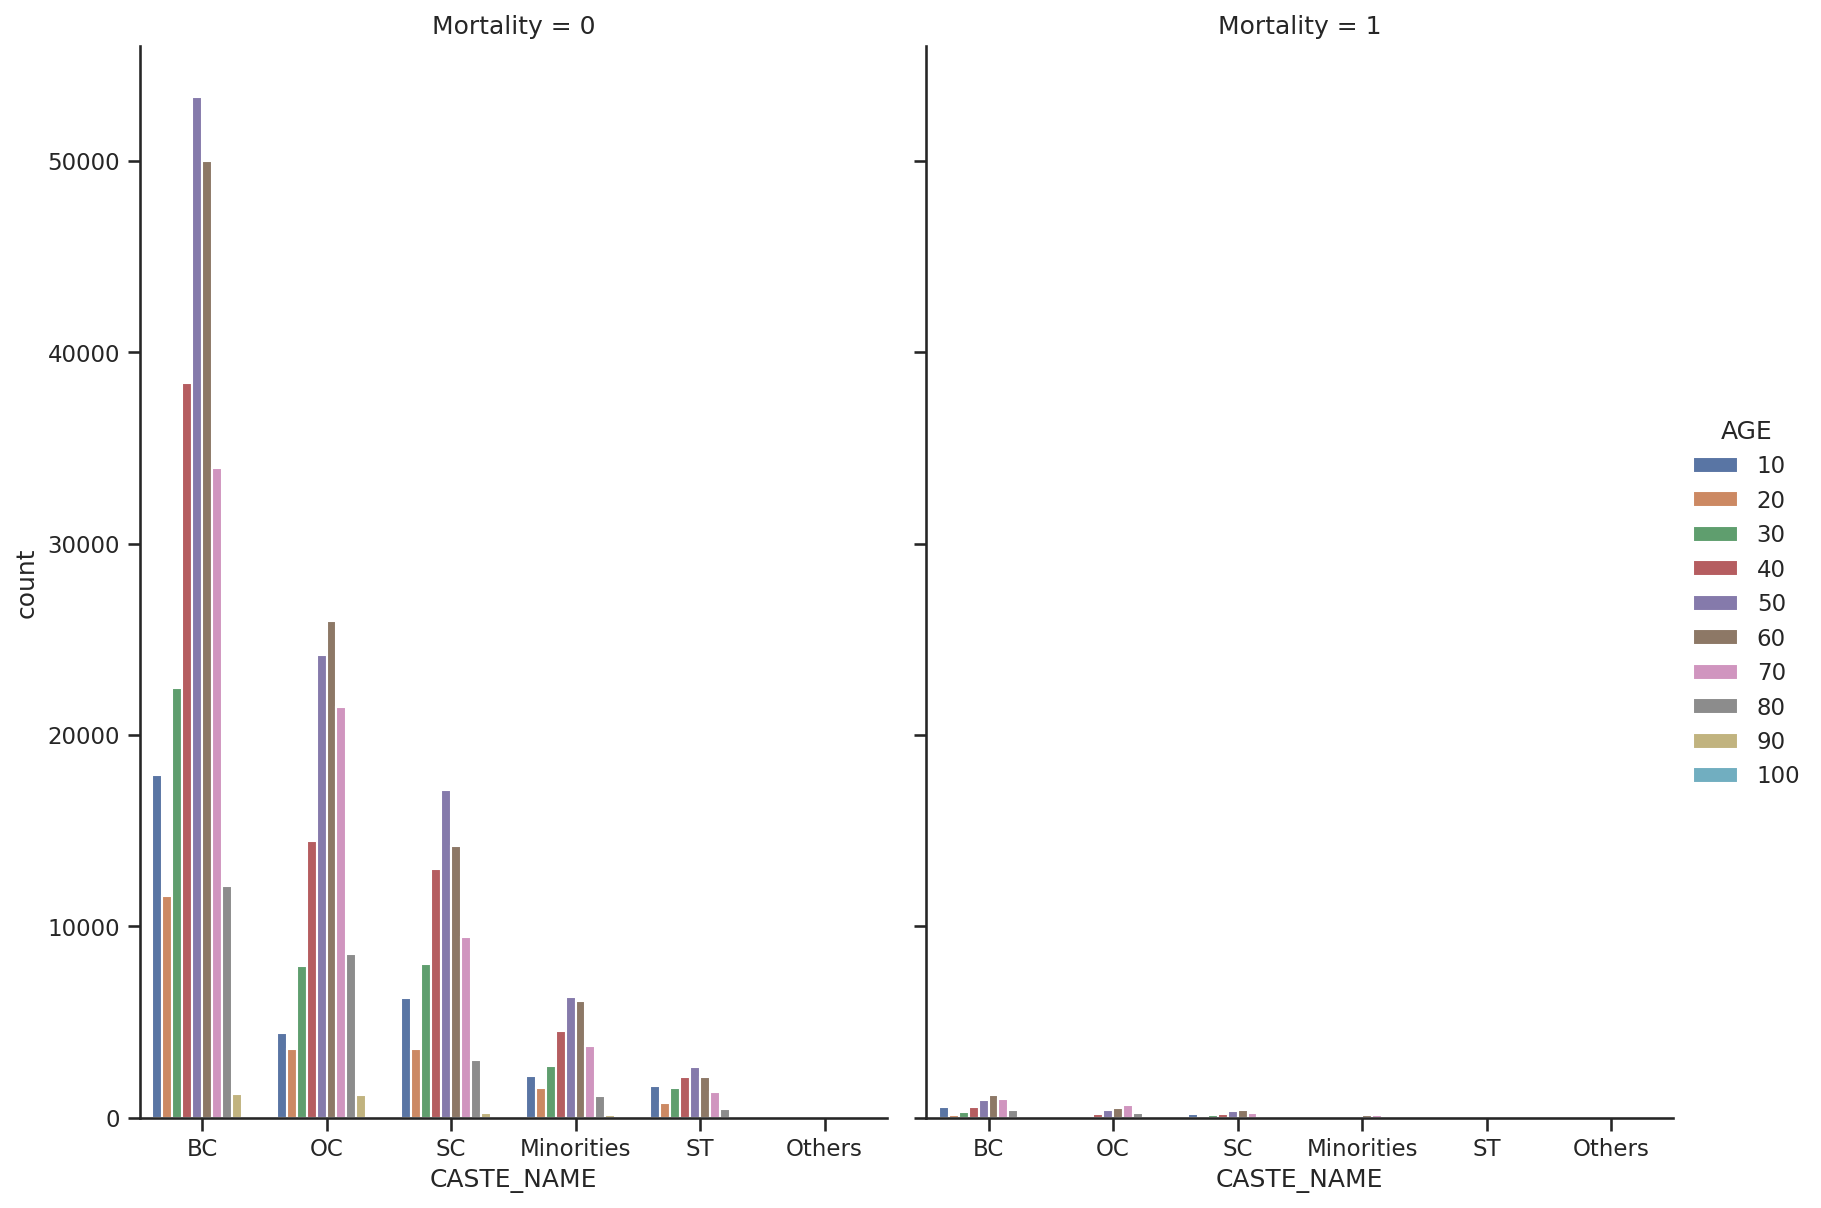

In [36]:
sns.catplot(x='CASTE_NAME', col='Mortality', hue='AGE', data=df, kind='count', height=8, aspect=.7)

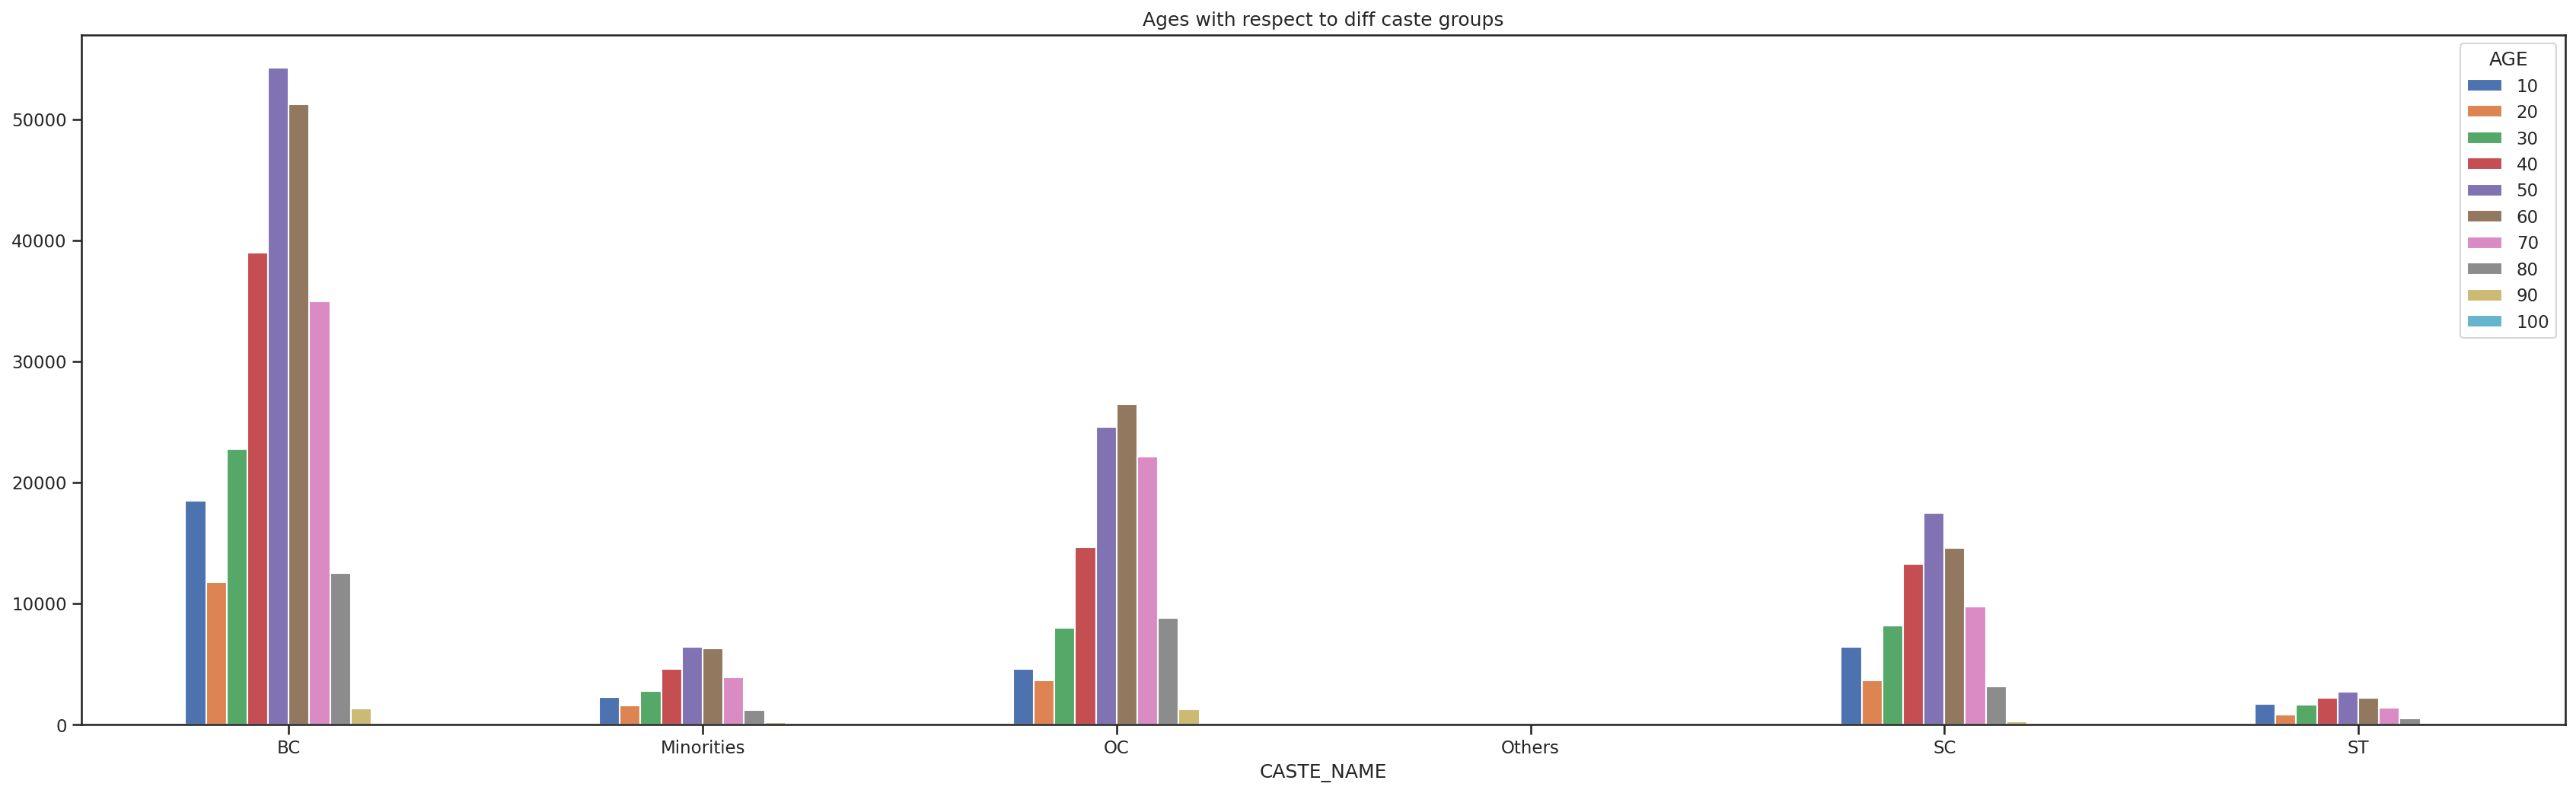

In [37]:
temp_df = df.groupby(['CASTE_NAME', 'AGE'])['CASTE_NAME'].count().unstack(['AGE'])
temp_df.plot.bar(rot=0, figsize=(25, 8))
plt.title('Ages with respect to diff caste groups')
plt.show()

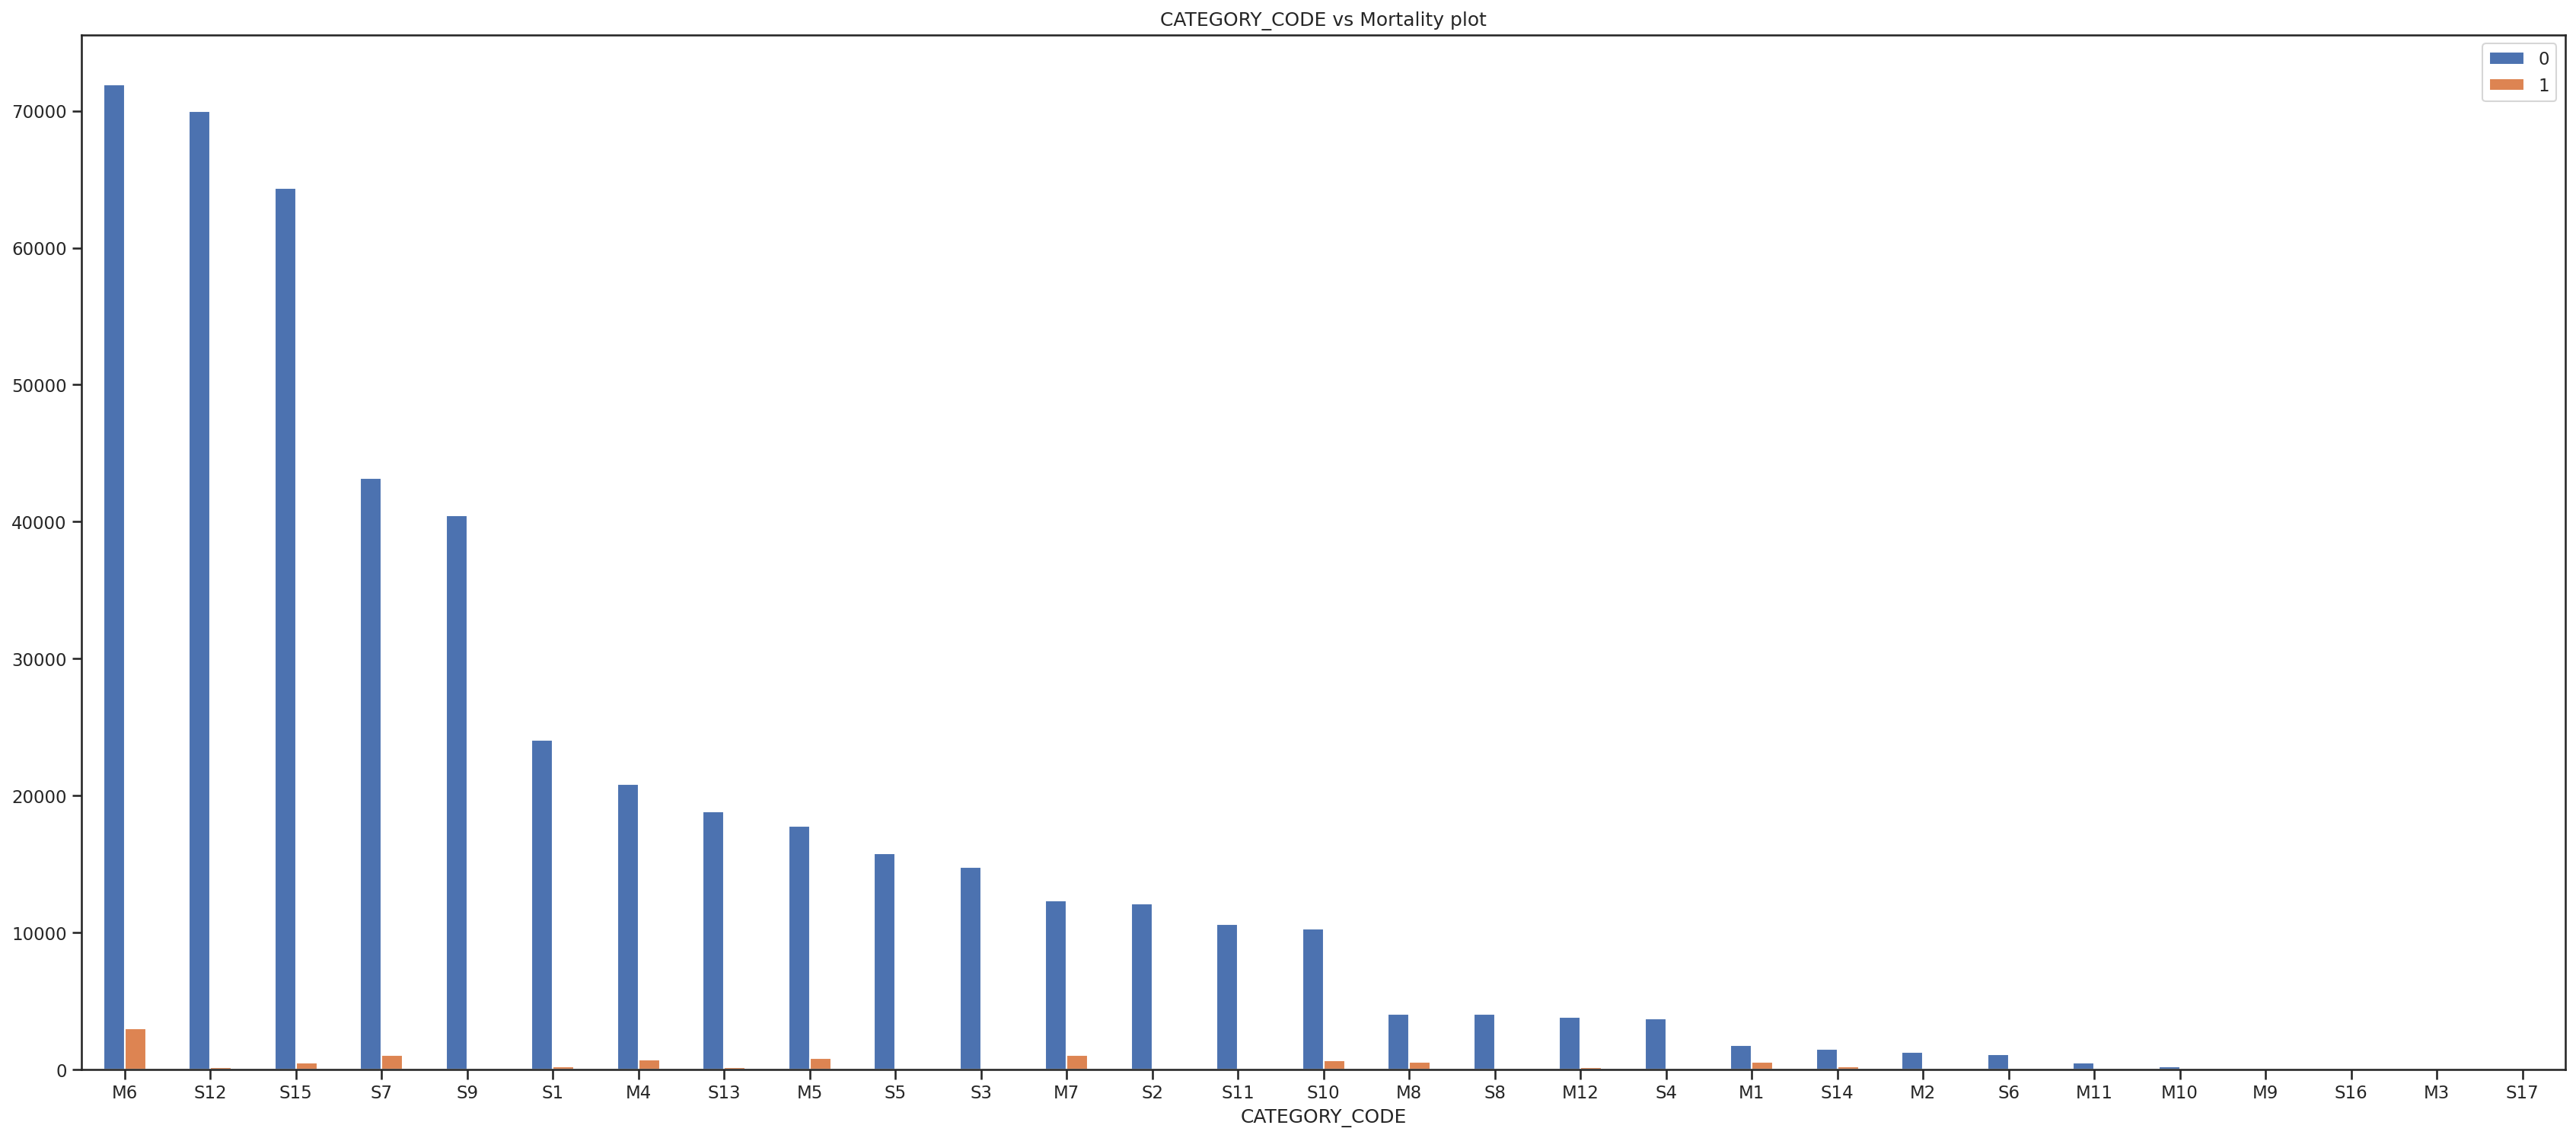

In [38]:
temp_df = df.groupby(['CATEGORY_CODE', 'Mortality'])['CATEGORY_CODE'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(25, 12))
plt.title('CATEGORY_CODE vs Mortality plot')
plt.show()

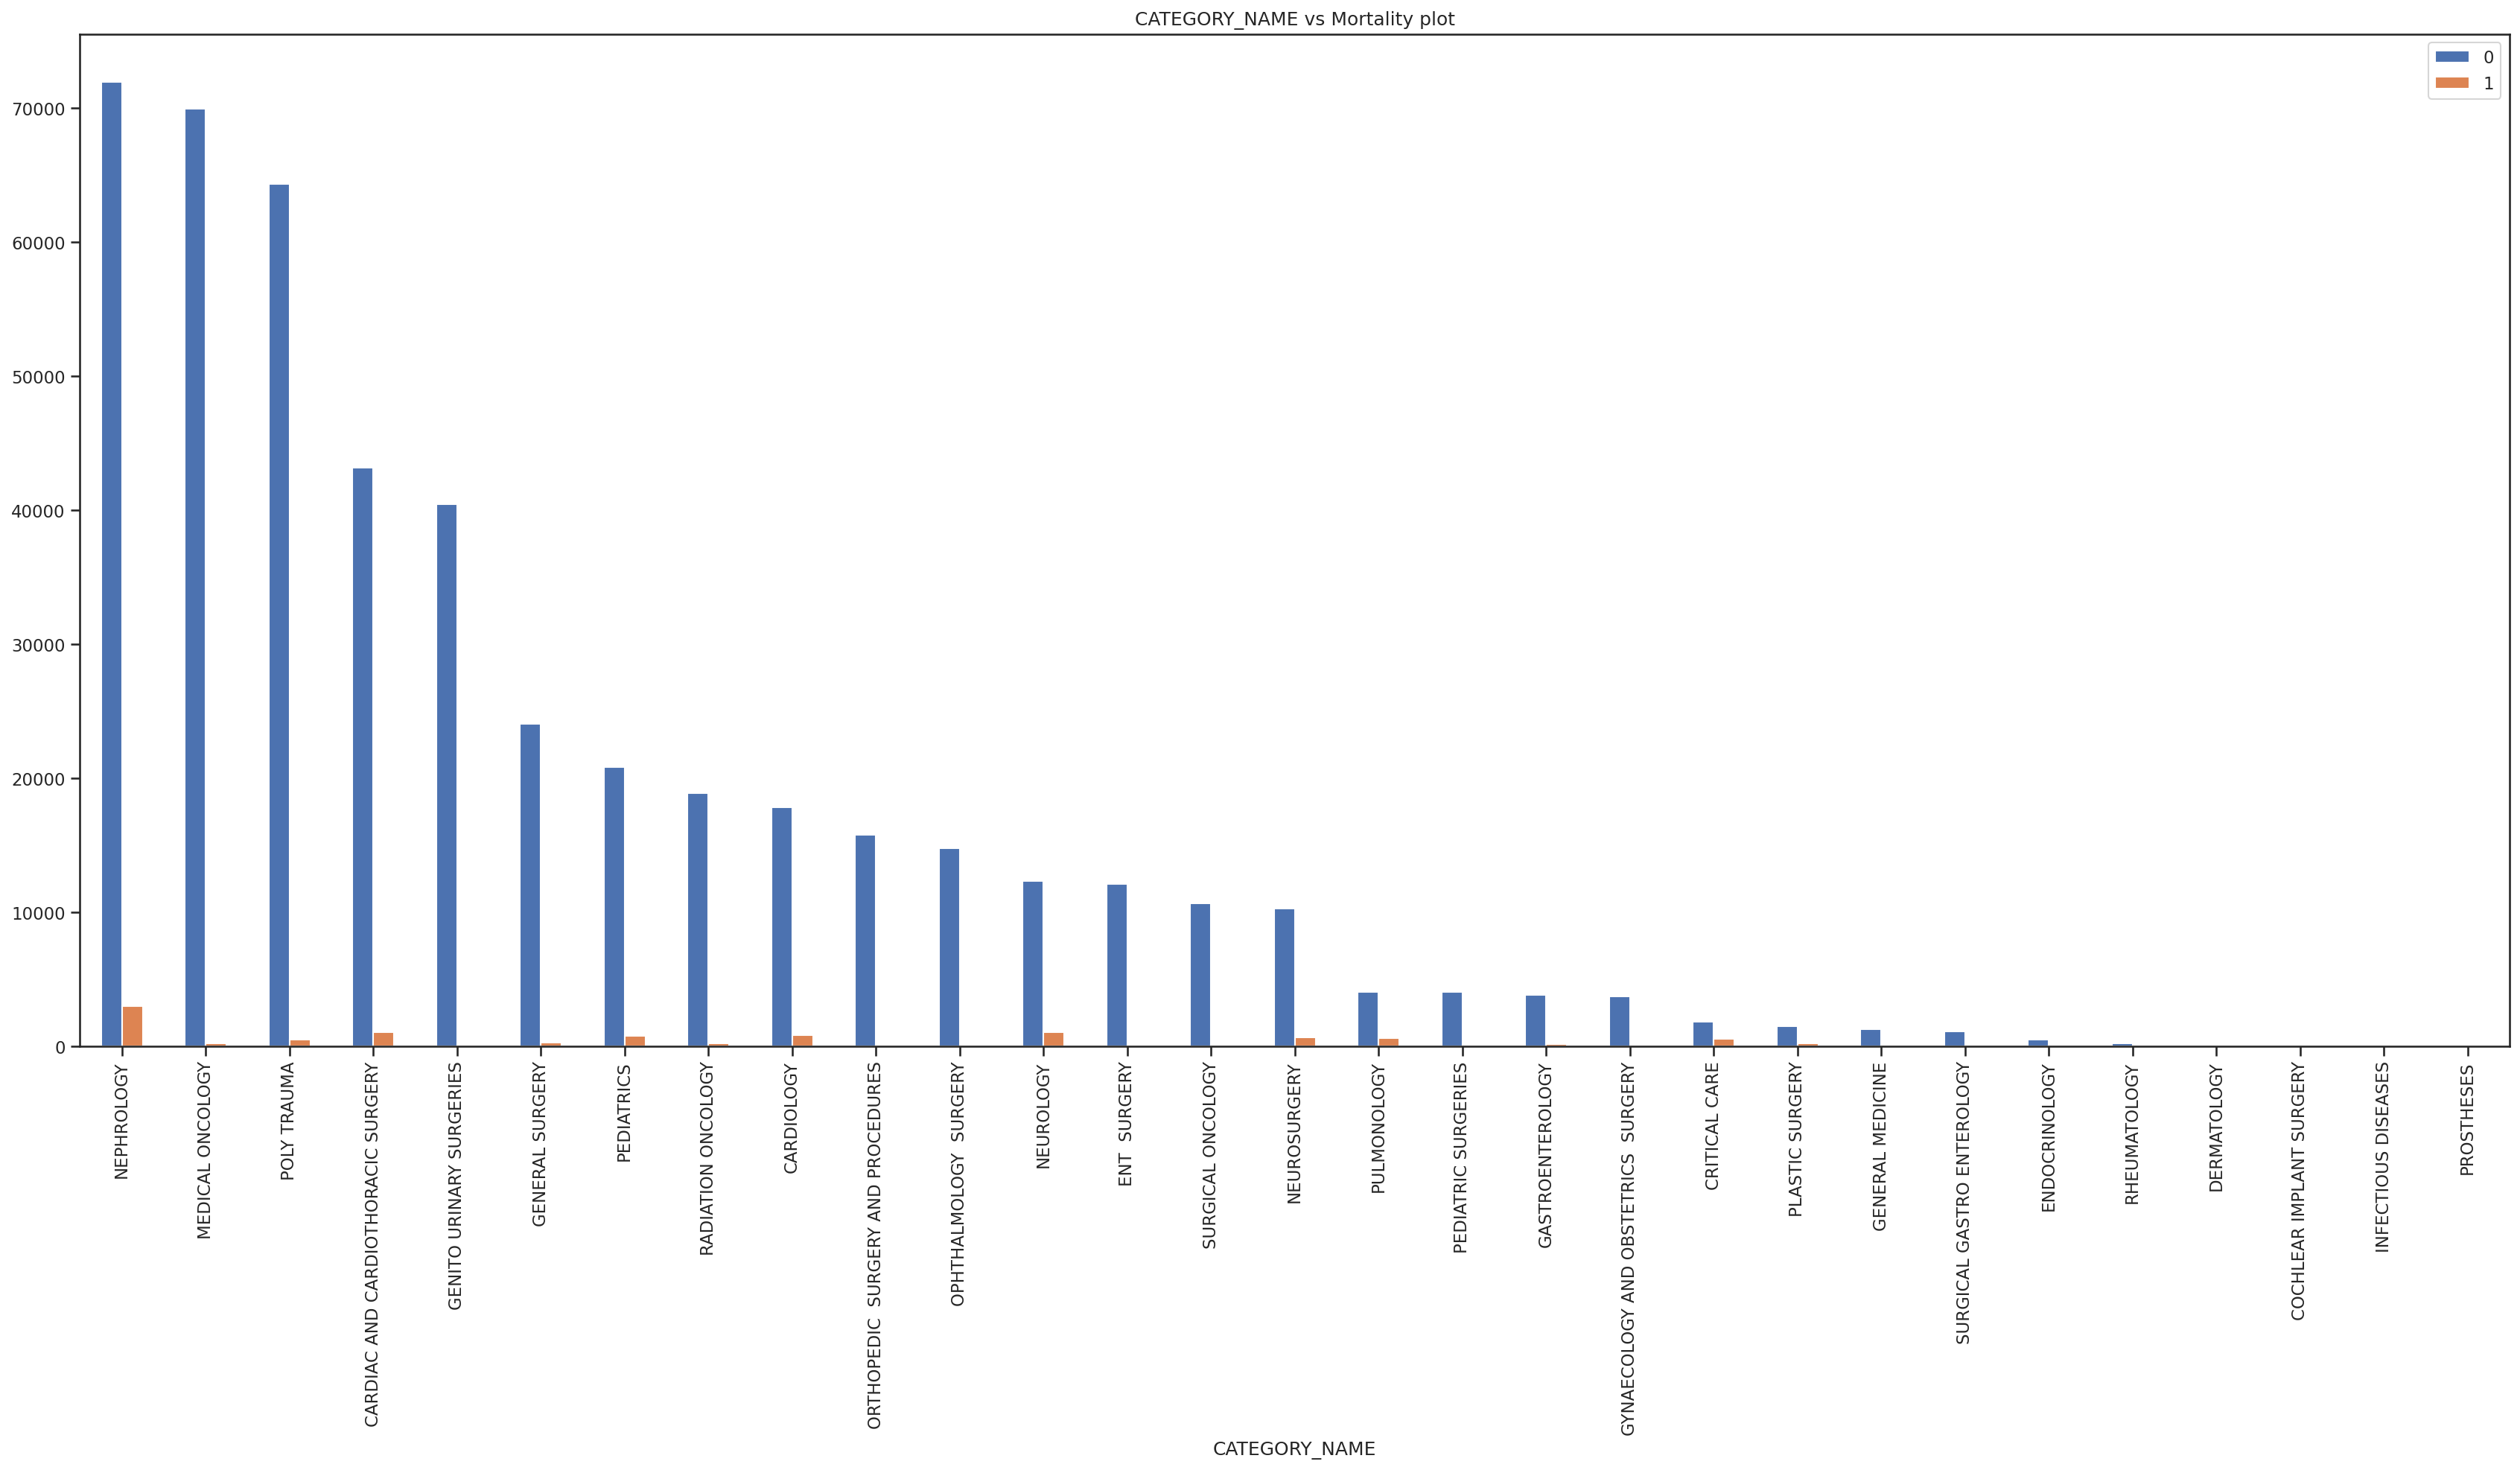

In [39]:
temp_df = df.groupby(['CATEGORY_NAME', 'Mortality'])['CATEGORY_NAME'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=90, figsize=(25, 12))
plt.title('CATEGORY_NAME vs Mortality plot')
plt.show()

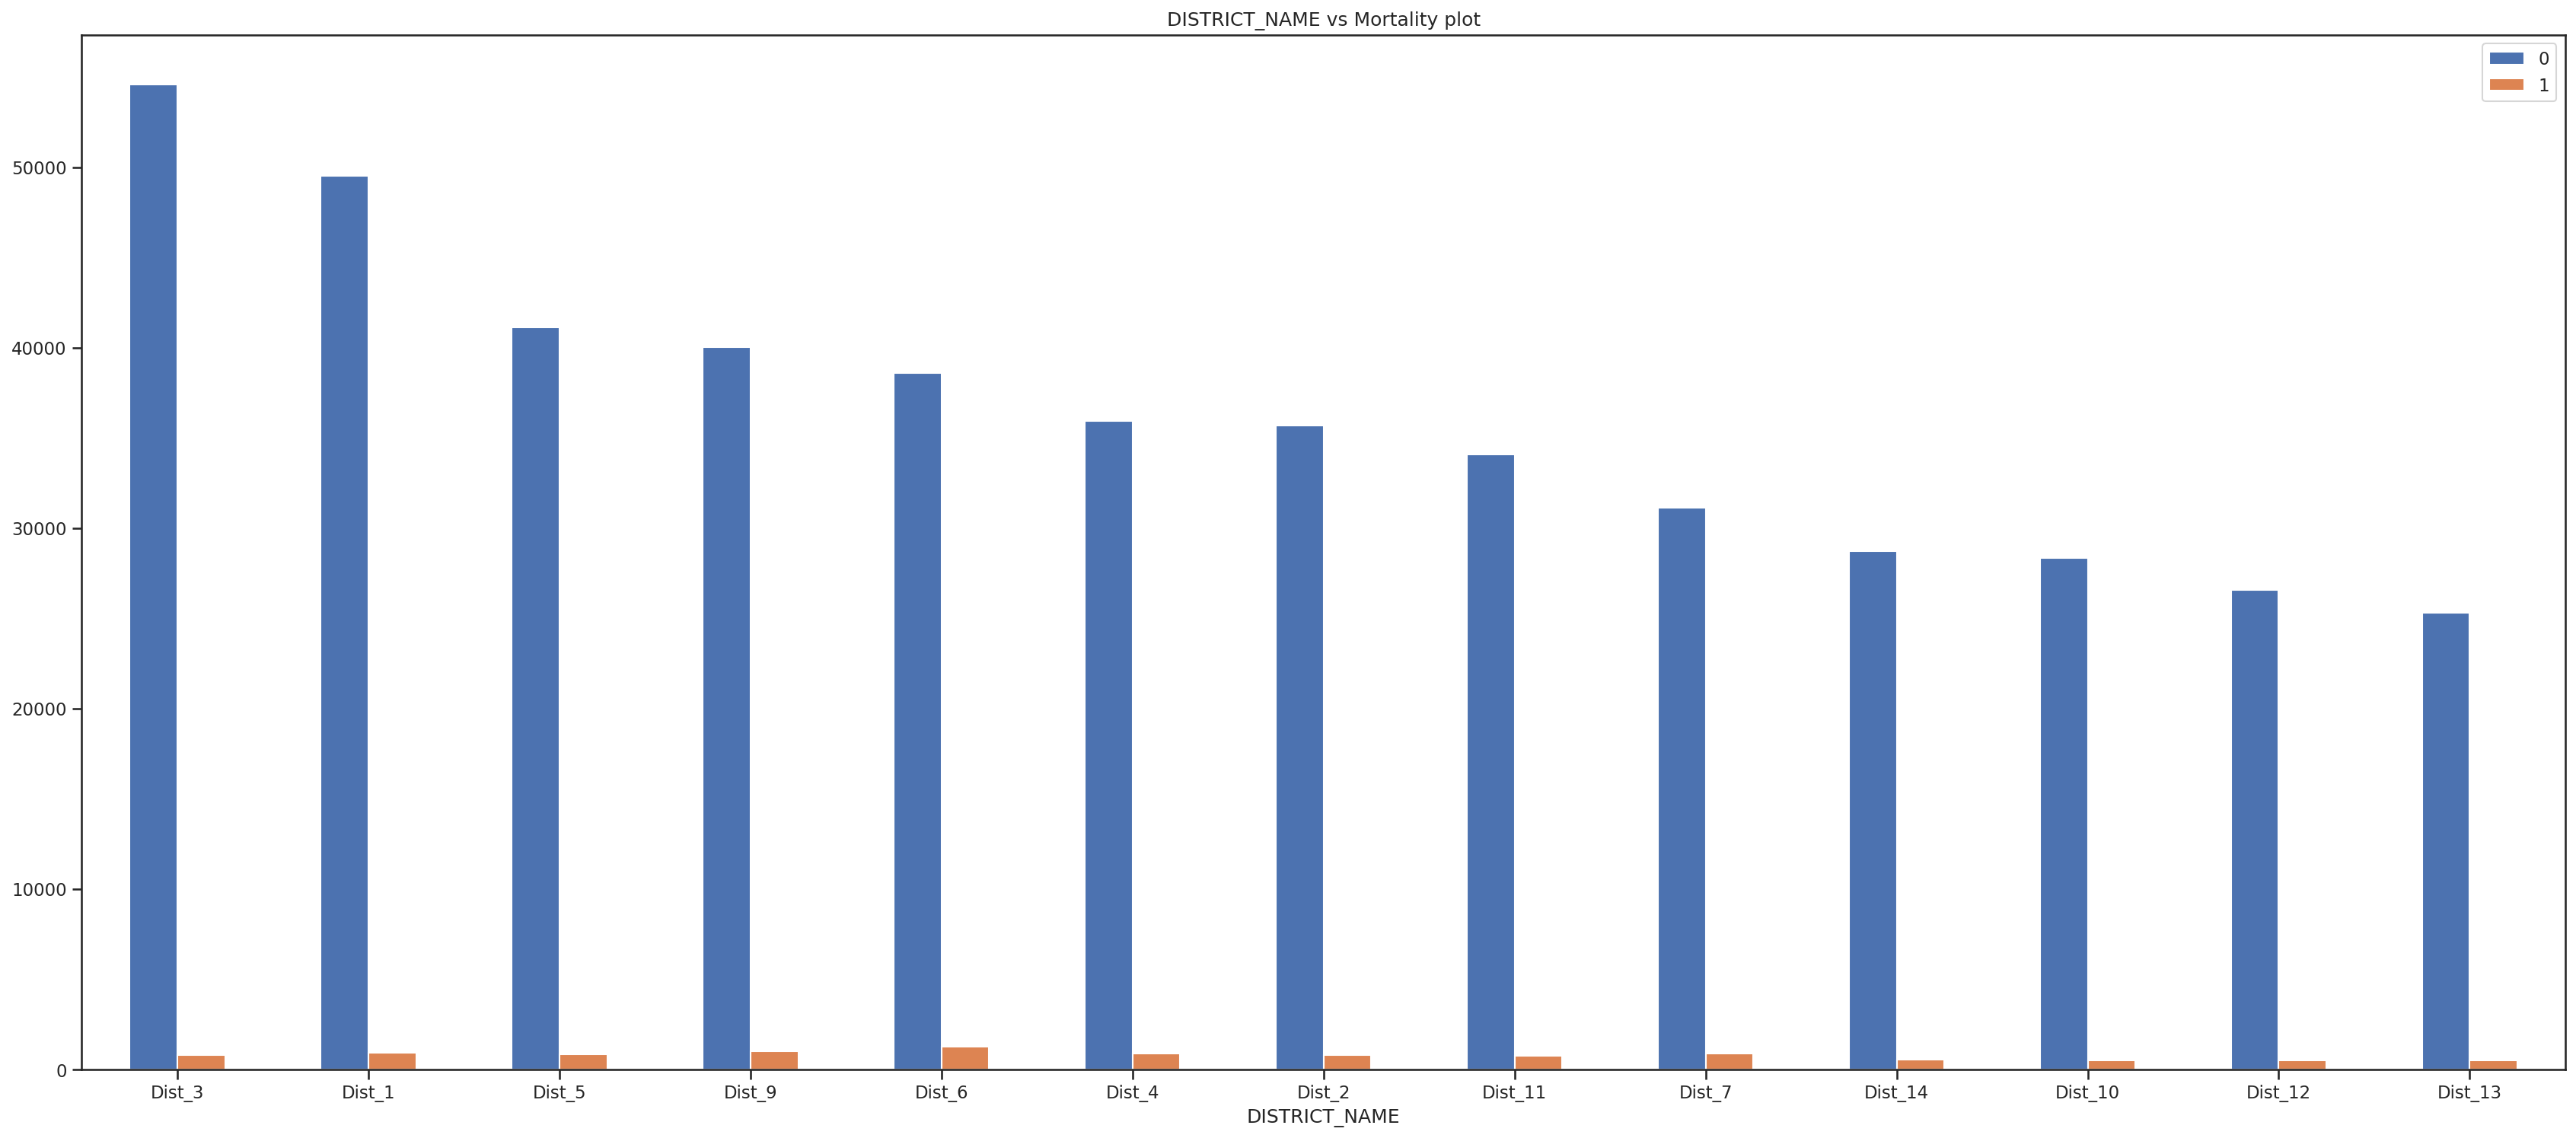

In [40]:
temp_df = df.groupby(['DISTRICT_NAME', 'Mortality'])['DISTRICT_NAME'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(25, 12))
plt.title('DISTRICT_NAME vs Mortality plot')
plt.show()

In [41]:
df = df.drop(['DISTRICT_NAME'], axis=1)

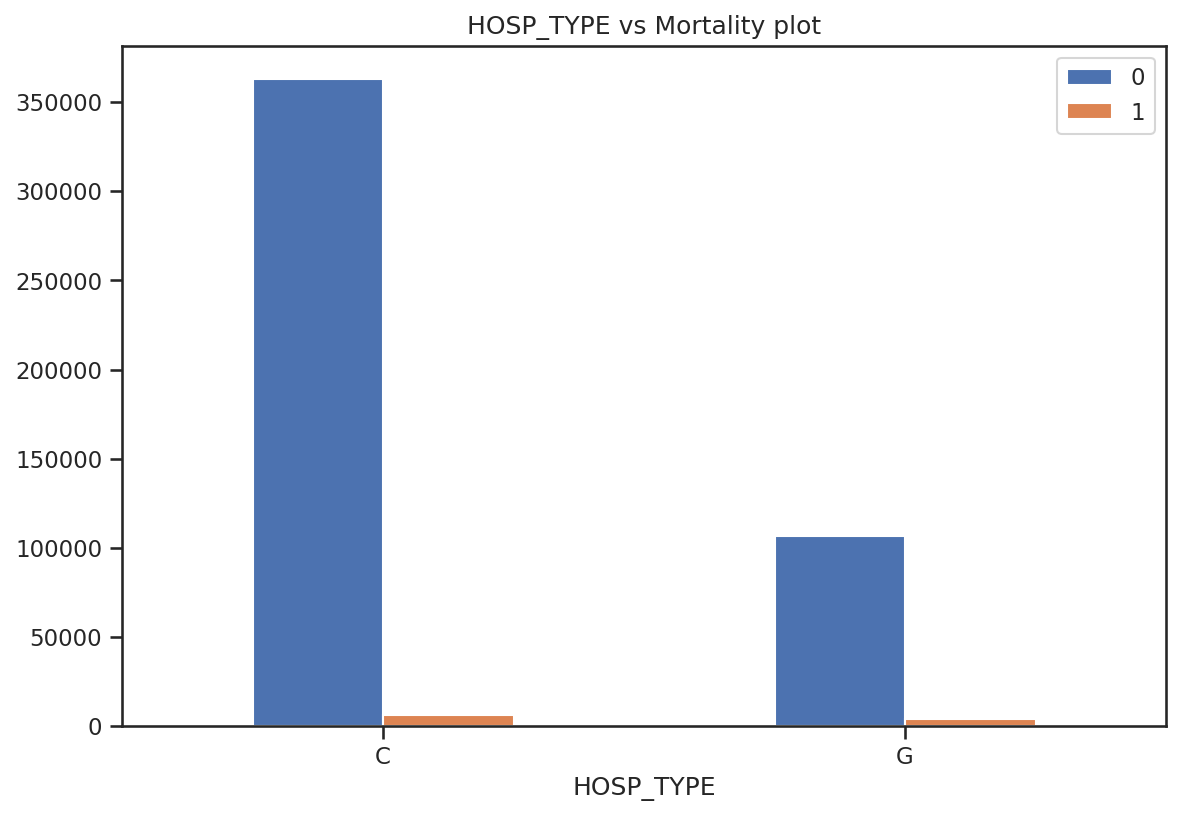

In [42]:
temp_df = df.groupby(['HOSP_TYPE', 'Mortality'])['HOSP_TYPE'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(8, 6))
plt.title('HOSP_TYPE vs Mortality plot')
plt.show()

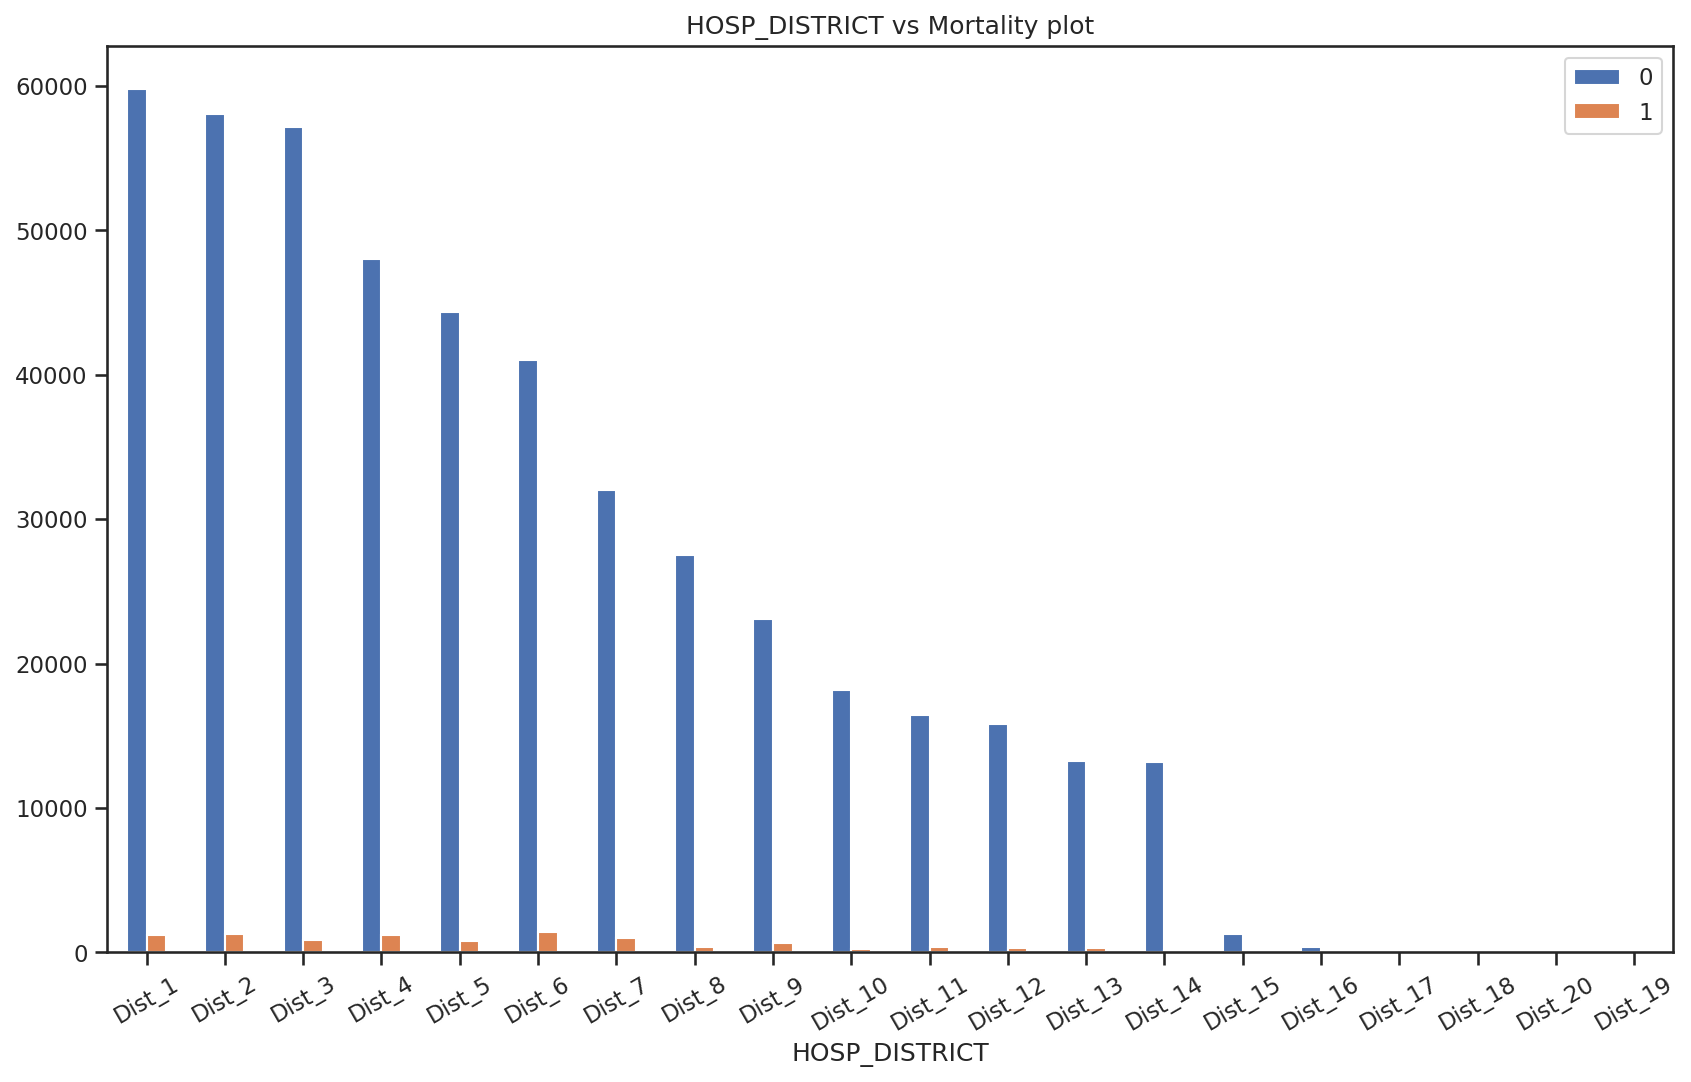

In [43]:
temp_df = df.groupby(['HOSP_DISTRICT', 'Mortality'])['HOSP_DISTRICT'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=30, figsize=(12, 8))
plt.title('HOSP_DISTRICT vs Mortality plot')
plt.show()

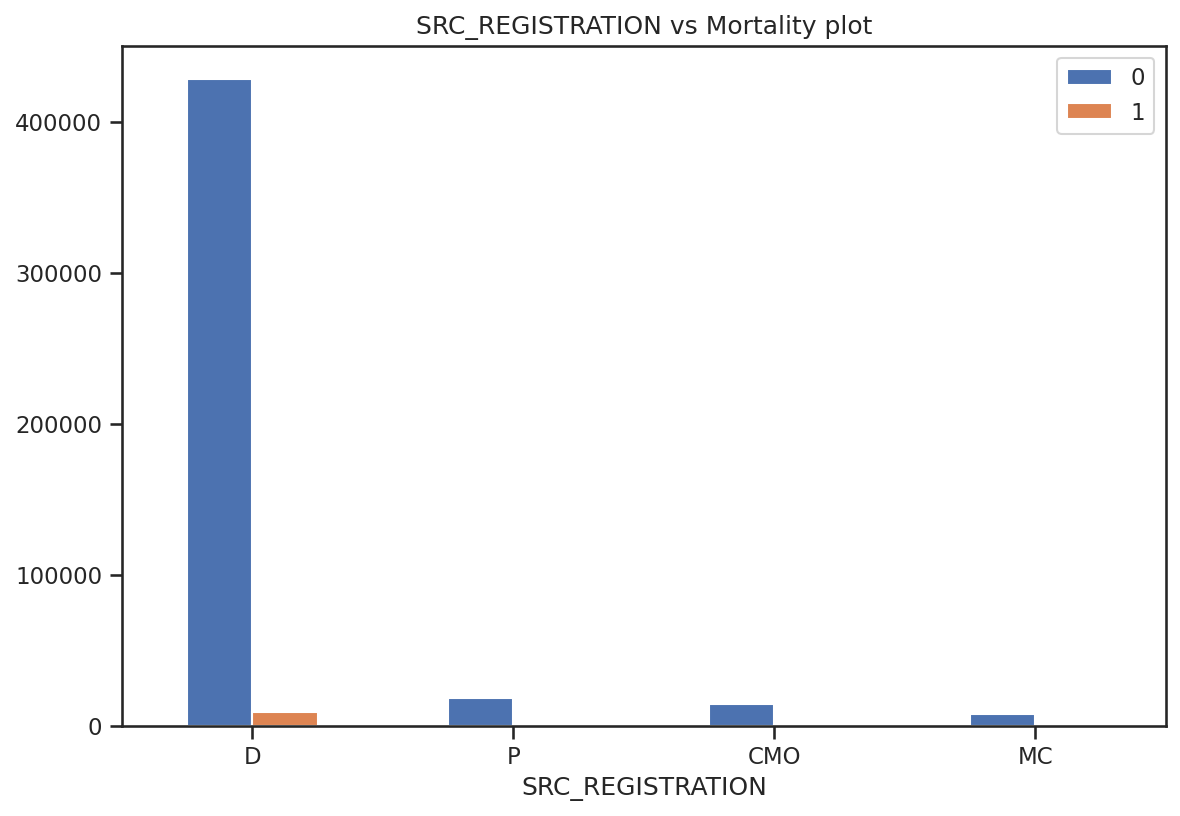

In [44]:
temp_df = df.groupby(['SRC_REGISTRATION', 'Mortality'])['SRC_REGISTRATION'].count().unstack(['Mortality'])
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(8, 6))
plt.title('SRC_REGISTRATION vs Mortality plot')
plt.show()

In [45]:
df = df.drop(['MORTALITY_DATE'], axis=1)

In [46]:
df.loc[(df['DISCHARGE_DATE'].isnull()) , 'DISCHARGE_DATE'] = '0/0/0000 0:00'

In [47]:
df['PREAUTH_DATE'] = pd.to_datetime(df['PREAUTH_DATE'])
df['CLAIM_DATE'] = pd.to_datetime(df['CLAIM_DATE'])
df['SURGERY_DATE'] = pd.to_datetime(df['SURGERY_DATE'])
df['DISCHARGE_DATE'] = pd.to_datetime(df['DISCHARGE_DATE'], errors = 'coerce')

df['PREAUTH_Month'] = df['PREAUTH_DATE'].dt.month
df['PREAUTH_Year'] = df['PREAUTH_DATE'].dt.year

df['CLAIM_Month'] = df['CLAIM_DATE'].dt.month
df['CLAIM_Year'] = df['CLAIM_DATE'].dt.year

df['SURGERY_Month'] = df['SURGERY_DATE'].dt.month
df['SURGERY_YEAR'] = df['SURGERY_DATE'].dt.year

df['DISCHARGE_Month'] = df['DISCHARGE_DATE'].dt.month
df['DISCHARGE_YEAR'] = df['DISCHARGE_DATE'].dt.year

In [48]:
df.loc[(df['DISCHARGE_YEAR'].isnull()) , 'DISCHARGE_YEAR'] = round(df['DISCHARGE_YEAR'].mean(), 0)
df.loc[(df['DISCHARGE_Month'].isnull()) , 'DISCHARGE_Month'] = round(df['DISCHARGE_Month'].mean(), 0)

In [49]:
df = df.drop(['PREAUTH_DATE', 'CLAIM_DATE', 'SURGERY_DATE', 'DISCHARGE_DATE'], axis=1)

In [50]:
pd.crosstab(df['SURGERY_YEAR'], df['Mortality']).T

SURGERY_YEAR,2013,2014,2015,2016,2017
Mortality,,,,,
0,7,60,995,144972,323532
1,0,4,90,4767,5261


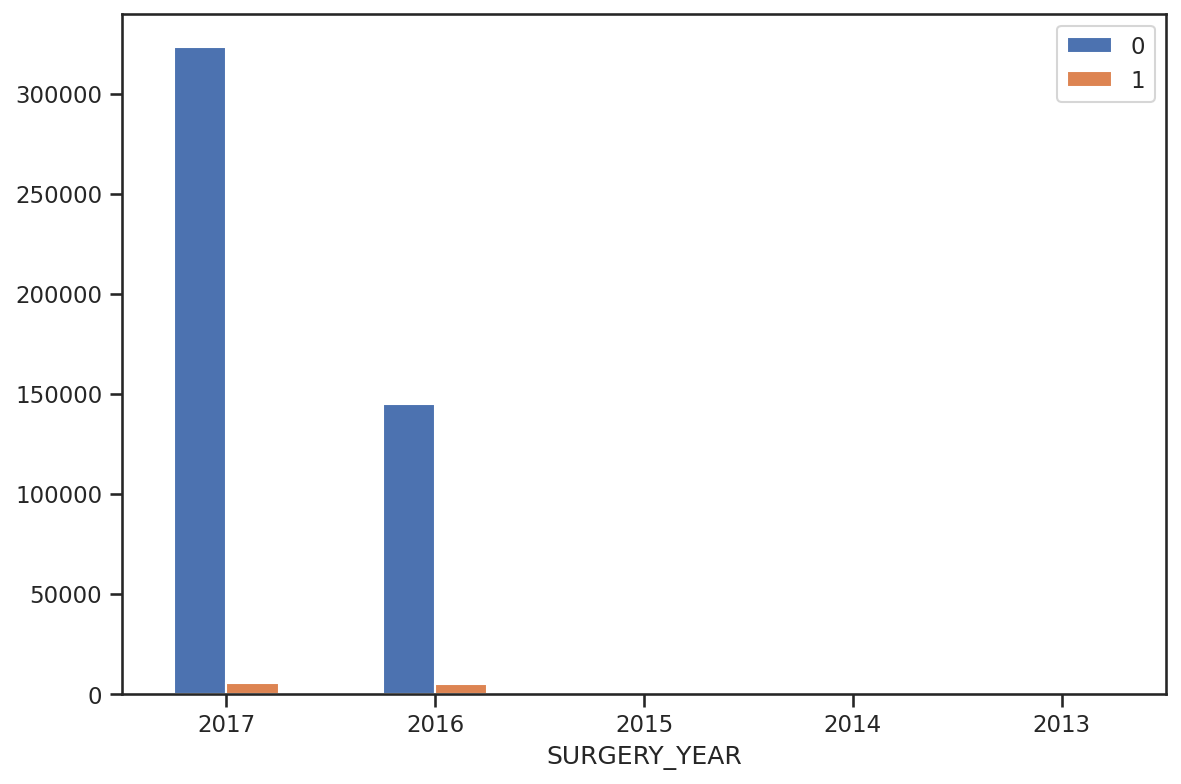

In [51]:
temp_df = df.groupby(['Mortality', 'SURGERY_YEAR'])['SURGERY_YEAR'].count().unstack('SURGERY_YEAR')
temp_df = temp_df.T
temp_df.columns = ['0', '1']
temp_df = temp_df.sort_values(by='0', ascending=False)
temp_df.plot.bar(rot=0, figsize=(8,6))

Text(0.5, 1.0, 'Months of Surgery')

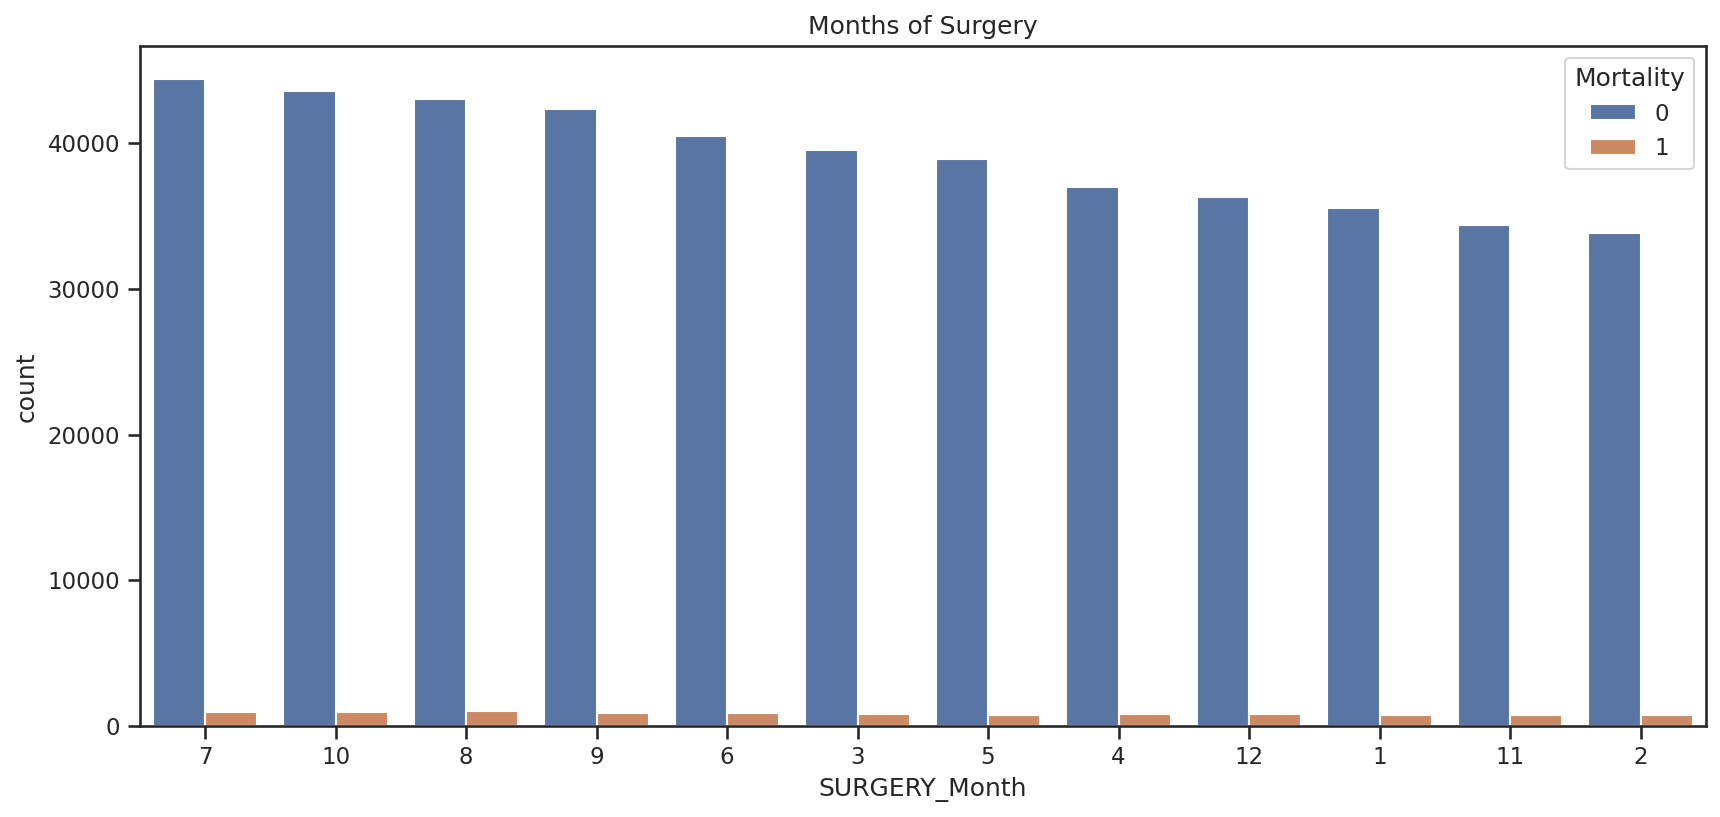

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(x="SURGERY_Month", hue='Mortality', data=df, order= df['SURGERY_Month'].value_counts().index)
plt.title("Months of Surgery")

In [53]:
df = df.drop(['SURGERY_Month', 'CLAIM_Month', 'PREAUTH_Month', 'DISCHARGE_Month', 'AGE'], axis=1)

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [55]:
X = df.drop('Mortality', axis=1)
y = df['Mortality']

In [56]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



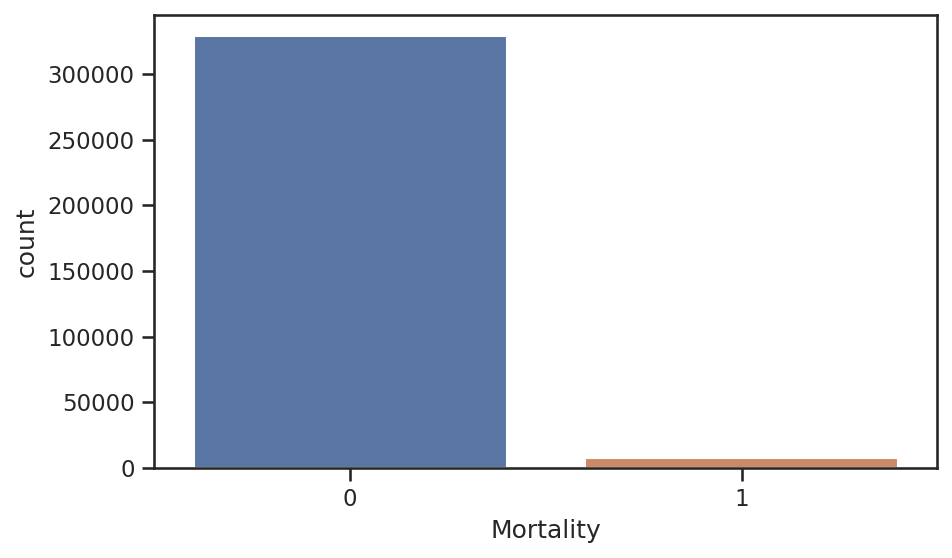

In [58]:
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From versi

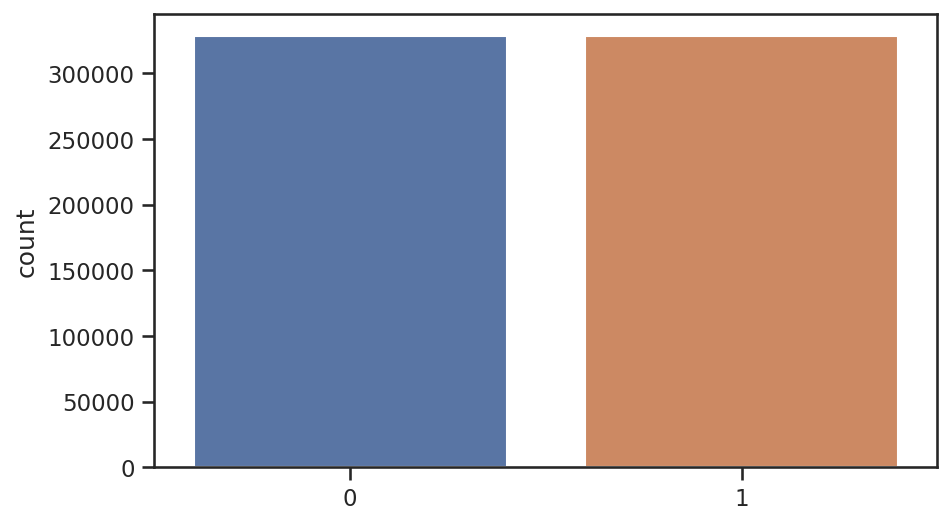

In [59]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=9)
X_train, y_train = smote.fit_sample(X_train, y_train)

sns.countplot(y_train)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(C=1, random_state=17, solver='liblinear')

c_values = np.logspace(-2, 2, 20)

clf = GridSearchCV(estimator=log_reg, param_grid={'C': c_values}, scoring='roc_auc', n_jobs=1, cv=5, verbose=1)

clf.fit(X_train, y_train)
# clf.best_params_

y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.6min finished


0.8102941483041131


In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('Confusion Matrix ==>')
print(conf_mat)
print('----------------------------------------------------------------------------------------')
print('Classification Report ==>')
print(report)

Confusion Matrix ==>
[[114290  26695]
 [   605   2317]]
----------------------------------------------------------------------------------------
Classification Report ==>
              precision    recall  f1-score   support

           0       0.99      0.81      0.89    140985
           1       0.08      0.79      0.15      2922

    accuracy                           0.81    143907
   macro avg       0.54      0.80      0.52    143907
weighted avg       0.98      0.81      0.88    143907



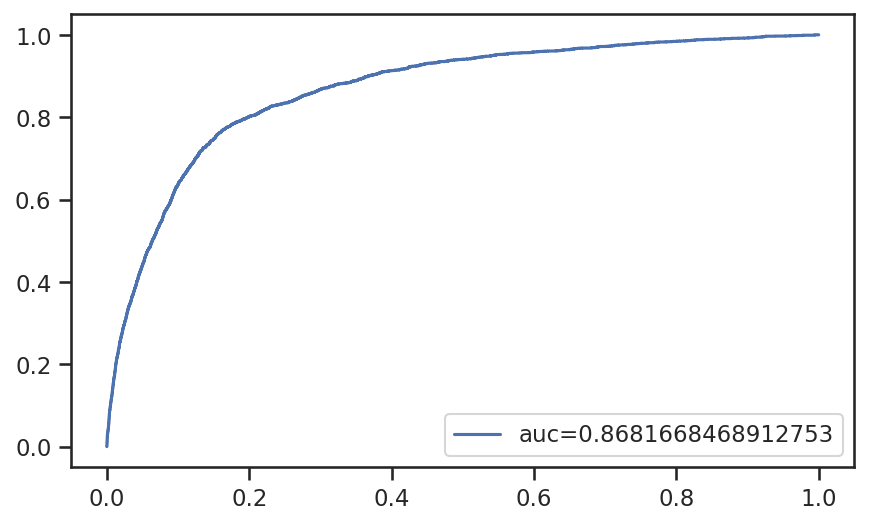

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [63]:
map_class = {0: 'NO', 1: 'YES'}
temp_df = pd.DataFrame({'prediction': y_pred, 'original': y_test})
temp_df['prediction'] = temp_df['prediction'].map(map_class)
temp_df['original'] = temp_df['original'].map(map_class)
temp_df.head()

,prediction,original
109794,NO,NO
185191,NO,NO
390939,YES,YES
173010,NO,NO
44823,NO,NO
